In [119]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.offline as po
import plotly.graph_objs as pg
from datetime import datetime
from scipy.stats import zscore
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [120]:
three_start_date = '2023-11'
three_end_date = '2024-02'

nine_start_date = '2023-04'
nine_end_date = '2024-02'

three_start_date = datetime.strptime(three_start_date, '%Y-%m')
three_end_date = datetime.strptime(three_end_date, '%Y-%m')

nine_start_date = datetime.strptime(nine_start_date, '%Y-%m')
nine_end_date = datetime.strptime(nine_end_date, '%Y-%m')

## Api Report Dataframe

In [121]:
api_report = pd.read_csv("datasets/api_report.csv", names=['id','org_id','business_name', 'success', 'no_record', 'server_error','revenue','date_captured','currency','country'])
api_report = api_report[~api_report['business_name'].str.contains("Prembly")]

In [122]:
api_report_df = api_report.copy()

api_report_df['date_captured'] = pd.to_datetime(api_report_df['date_captured'])

api_three_months_df = api_report_df[(api_report_df['date_captured'] >= three_start_date) & (api_report_df['date_captured'] <= three_end_date)]
api_nine_months_df = api_report_df[(api_report_df['date_captured'] >= nine_start_date) & (api_report_df['date_captured'] <= nine_end_date)]

api_three_months_df['date_captured'] = api_three_months_df['date_captured'].dt.strftime('%Y-%m')
api_nine_months_df['date_captured'] = api_nine_months_df['date_captured'].dt.strftime('%Y-%m')

api_three_months_df = api_three_months_df.groupby(["org_id", "business_name"], as_index=False).agg({"success": pd.Series.sum, "revenue": pd.Series.sum, "server_error": pd.Series.sum, "no_record": pd.Series.sum})
api_nine_months_df = api_nine_months_df.groupby(["org_id", "business_name"], as_index=False).agg({"success": pd.Series.sum, "revenue": pd.Series.sum, "server_error": pd.Series.sum, "no_record": pd.Series.sum})

print("Three Months Dataset: ", api_three_months_df.shape)
print()
print("Nine Months Dataset: ", api_nine_months_df.shape)

Three Months Dataset:  (507, 6)

Nine Months Dataset:  (628, 6)


## End Point Dataframe

In [123]:
end_point = pd.read_csv("datasets/endpoint_data.csv", names=['id', 'org_id', 'business_name', 'endpoint_called', 'total_calls', 'date_captured'])
end_point = end_point[~end_point['business_name'].str.contains("Prembly")]

In [124]:
endpoint_report_df = end_point.copy()
endpoint_report_df["num_of_calls"] = endpoint_report_df["total_calls"]
endpoint_report_df['date_captured'] = pd.to_datetime(endpoint_report_df['date_captured'])

endpoint_three_months_df = endpoint_report_df[(endpoint_report_df['date_captured'] >= three_start_date) & (endpoint_report_df['date_captured'] <= three_end_date)]
endpoint_nine_months_df = endpoint_report_df[(endpoint_report_df['date_captured'] >= nine_start_date) & (endpoint_report_df['date_captured'] <= nine_end_date)]

endpoint_three_months_df['date_captured'] = endpoint_three_months_df['date_captured'].dt.strftime('%Y-%m')
endpoint_nine_months_df['date_captured'] = endpoint_nine_months_df['date_captured'].dt.strftime('%Y-%m')

endpoint_three_months_df = endpoint_three_months_df.groupby(["org_id", "business_name"], as_index=False).agg({"total_calls": pd.Series.sum, "num_of_calls": pd.Series.count})
endpoint_nine_months_df = endpoint_nine_months_df.groupby(["org_id", "business_name"], as_index=False).agg({"total_calls": pd.Series.sum, "num_of_calls": pd.Series.count})

print("Three Months Dataset: ", endpoint_three_months_df.shape)
print()
print("Nine Months Dataset: ", endpoint_nine_months_df.shape)

Three Months Dataset:  (473, 4)

Nine Months Dataset:  (594, 4)


## Merchants Dataframe

In [73]:
merchant = pd.read_csv("datasets/merchant_table.csv", names=['org_id', 'business_name', 'country', 'currency', 'extra', 'verified_sector', 'platform', 'date_created', 'lead_source', 'verification_status', 'business_document', 'email', 'phone'])
print(merchant.shape)
print()
merchant.head(2)

(4293, 13)



,org_id,business_name,country,currency,extra,verified_sector,platform,date_created,lead_source,verification_status,business_document,email,phone
1,450b7f93-9de4-46d1-a456-3235c6c0b632,Varens Technologies,NG,NGN,True,no sector identified,PREMBLY,2023-06-24T01:42:51.687557+0000,no-referral,APPROVED,uploaded,ini@varens.net,2.35E+12
2,3f58f27c-b63d-4d5f-a29c-29cddf85797a,Cliqki Technologies,NG,NGN,True,no sector identified,PREMBLY,2023-06-24T01:42:51.687557+0000,no-referral,APPROVED,uploaded,yemio@cliqki.com,2.35E+12


### Filtering Approved Cusomters

In [74]:
print("All Merchants: ", merchant.shape)
merchant_df = merchant.copy()
merchant_df = merchant_df[merchant_df["verification_status"] == "APPROVED"]
print()
print("Approved Merchants: ", merchant_df.shape)
merchant_df.head(2)

All Merchants:  (4293, 13)

Approved Merchants:  (1042, 13)


,org_id,business_name,country,currency,extra,verified_sector,platform,date_created,lead_source,verification_status,business_document,email,phone
1,450b7f93-9de4-46d1-a456-3235c6c0b632,Varens Technologies,NG,NGN,True,no sector identified,PREMBLY,2023-06-24T01:42:51.687557+0000,no-referral,APPROVED,uploaded,ini@varens.net,2.35E+12
2,3f58f27c-b63d-4d5f-a29c-29cddf85797a,Cliqki Technologies,NG,NGN,True,no sector identified,PREMBLY,2023-06-24T01:42:51.687557+0000,no-referral,APPROVED,uploaded,yemio@cliqki.com,2.35E+12


### Lead Source

In [75]:
merchant_df["lead_source"] = merchant_df["lead_source"].apply(lambda x: "referal" if x != "no-referral" else x)
merchant_df.lead_source.value_counts()

no-referral    871
referal        171
Name: lead_source, dtype: int64

### Verified Sector

In [76]:
merchant_df["verified_sector"] = merchant_df["verified_sector"].apply(lambda x: "identified" if x != "no sector identified" and x != "None" else x)
merchant_df["verified_sector"] = merchant_df["verified_sector"].apply(lambda x: "no sector identified" if x == "None" else x)
merchant_df.verified_sector.value_counts()

no sector identified    816
identified              226
Name: verified_sector, dtype: int64

### Country

In [77]:
merchant_df["country"] = merchant_df["country"].apply(lambda x: "other country" if x != "NG" else x)
merchant_df.country.value_counts()

NG               974
other country     68
Name: country, dtype: int64

In [78]:
merchant_df = merchant_df.drop(["extra", "verification_status"], axis=1)
merchant_df["date_created"] = pd.to_datetime(merchant_df["date_created"])
merchant_df['date_created'] = merchant_df['date_created'].dt.strftime('%Y-%m')
print(merchant_df.shape)
print()
merchant_df.head(2)

(1042, 11)



,org_id,business_name,country,currency,verified_sector,platform,date_created,lead_source,business_document,email,phone
1,450b7f93-9de4-46d1-a456-3235c6c0b632,Varens Technologies,NG,NGN,no sector identified,PREMBLY,2023-06,no-referral,uploaded,ini@varens.net,2.35E+12
2,3f58f27c-b63d-4d5f-a29c-29cddf85797a,Cliqki Technologies,NG,NGN,no sector identified,PREMBLY,2023-06,no-referral,uploaded,yemio@cliqki.com,2.35E+12


## Wallet Funding Dataframe

In [1]:
wallet_funding = pd.read_csv("datasets/wallet_funding.csv", names = ['org_id', 'business_name', 'amount', 'channel', 'currency', 'trans_desc', 'previous', 'reference', 'trans_state', 'trans_type', 'date_of_transaction'])
wallet_funding = wallet_funding[~wallet_funding['business_name'].str.contains("Prembly")]
wallet_df = wallet_funding.copy()
wallet_df["trans_frequency"] = wallet_df["amount"]

wallet_df = wallet_df.groupby(["org_id", "business_name"], as_index=False).agg({"amount": pd.Series.sum, "trans_frequency": pd.Series.count})
print(wallet_df.shape)
wallet_df.head(2)

NameError: name 'pd' is not defined

### Merging The Dataframes

In [128]:
wallet_funding[wallet_funding["business_name"]=="Ogamoni"]

,org_id,business_name,amount,channel,currency,trans_desc,previous,reference,trans_state,trans_type,date_of_transaction
3904,84496f0b-bc4e-4cc2-938a-c1c932af6244,Ogamoni,5000.00,BANK,NGN,Paystack Card Payment,None,xoij01dhk1,success,credit,2023-10-25T18:39:01.793547+0000


In [118]:
wallet_funding.head(2)

,org_id,business_name,amount,channel,currency,trans_desc,previous,reference,trans_state,trans_type,date_of_transaction
1,ced4c0c7-cbe0-4f9c-91db-d9bfdcab4315,Sharesell,1560.00,Manual funding,NGN,WLT/PREMBLY/SHARESELL,None,WLTFb5539370,success,credit,2023-07-17T12:03:15.122243+0000
2,8b43b254-04e5-4d11-97bc-e50f969c45b6,Venia Technologies Ltd,1650.00,Manual funding,NGN,WLT/PREMBLY/VENIA TECHNOLOGIES LTD,None,WLTF5607fb0b,success,credit,2023-07-17T12:03:15.122243+0000


In [80]:
three_months_df = pd.merge(endpoint_three_months_df, api_three_months_df, on=["org_id", "business_name"], how="outer")
nine_months_df = pd.merge(endpoint_nine_months_df, api_nine_months_df, on=["org_id", "business_name"], how="outer")
print(three_months_df.shape)
print(nine_months_df.shape)

(507, 8)
(628, 8)


In [81]:
api_report = pd.read_csv("datasets/api_report.csv", names=['id','org_id','business_name', 'success', 'no_record', 'server_error','revenue','date_captured','currency','country'])
api_report = api_report[~api_report['business_name'].str.contains("Prembly")]

api_report_df = api_report.copy()

api_report_df['date_captured'] = pd.to_datetime(api_report_df['date_captured'])

api_three_months_df = api_report_df[(api_report_df['date_captured'] >= three_start_date) & (api_report_df['date_captured'] <= three_end_date)]
api_nine_months_df = api_report_df[(api_report_df['date_captured'] >= nine_start_date) & (api_report_df['date_captured'] <= nine_end_date)]

api_three_months_df['date_captured'] = api_three_months_df['date_captured'].dt.strftime('%Y-%m')
api_nine_months_df['date_captured'] = api_nine_months_df['date_captured'].dt.strftime('%Y-%m')

print("Three Months Dataset: ", api_three_months_df.shape)
print()
print("Nine Months Dataset: ", api_nine_months_df.shape)

Three Months Dataset:  (1476, 10)

Nine Months Dataset:  (3037, 10)


In [82]:
end_point = pd.read_csv("datasets/endpoint_data.csv", names=['id', 'org_id', 'business_name', 'endpoint_called', 'total_calls', 'date_captured'])
end_point = end_point[~end_point['business_name'].str.contains("Prembly")]

endpoint_report_df = end_point.copy()
endpoint_report_df["num_of_calls"] = endpoint_report_df["total_calls"]
endpoint_report_df['date_captured'] = pd.to_datetime(endpoint_report_df['date_captured'])

endpoint_three_months_df = endpoint_report_df[(endpoint_report_df['date_captured'] >= three_start_date) & (endpoint_report_df['date_captured'] <= three_end_date)]
endpoint_nine_months_df = endpoint_report_df[(endpoint_report_df['date_captured'] >= nine_start_date) & (endpoint_report_df['date_captured'] <= nine_end_date)]

endpoint_three_months_df['date_captured'] = endpoint_three_months_df['date_captured'].dt.strftime('%Y-%m')
endpoint_nine_months_df['date_captured'] = endpoint_nine_months_df['date_captured'].dt.strftime('%Y-%m')

print("Three Months Dataset: ", endpoint_three_months_df.shape)
print()
print("Nine Months Dataset: ", endpoint_nine_months_df.shape)

Three Months Dataset:  (3417, 7)

Nine Months Dataset:  (7944, 7)


## Deeper Dive On June

In [83]:
june_start_date = '2023-06'
june_end_date = '2023-07'

june_start_date = datetime.strptime(june_start_date, '%Y-%m')
june_end_date = datetime.strptime(june_end_date, '%Y-%m')

endpoint_june = end_point.copy()
endpoint_june['date_captured'] = pd.to_datetime(endpoint_june['date_captured'])
endpoint_june = endpoint_june[(endpoint_june['date_captured'] == june_start_date)]
endpoint_june['date_captured'] = endpoint_june['date_captured'].dt.strftime('%Y-%m')
print("June endpoint Dataset: ", endpoint_three_months_df.shape)


api_june = api_report.copy()
api_june['date_captured'] = pd.to_datetime(api_june['date_captured'])
api_june = api_june[(api_june['date_captured'] == june_start_date)]
api_june['date_captured'] = api_june['date_captured'].dt.strftime('%Y-%m')
print("June api Dataset: ", api_june.shape)

merchant_june = merchant.copy()
merchant_june['date_created'] = pd.to_datetime(merchant_june['date_created'])
merchant_june = merchant_june[(merchant_june['date_created'] == june_start_date)]
merchant_june['date_created'] = merchant_june['date_created'].dt.strftime('%Y-%m')
print("June Merchant Dataset: ", merchant_june.shape)

wallet_june = wallet_funding.copy()
wallet_june['date_of_transaction'] = pd.to_datetime(wallet_june['date_of_transaction'])
wallet_june = wallet_june[(wallet_june['date_of_transaction'] == june_start_date)]
wallet_june['date_of_transaction'] = wallet_june['date_of_transaction'].dt.strftime('%Y-%m')
print("June Wallet Funding Dataset: ", wallet_june.shape)

June endpoint Dataset:  (3417, 7)
June api Dataset:  (163, 10)
June Merchant Dataset:  (0, 13)
June Wallet Funding Dataset:  (0, 11)


# Exploiratory Data Analysis

-  Summary Statistics
-  Time series Analysis
-  Correlation Analysis
-  Customer Segmentation
- Geospatial Analysis

## Summary Statistics

- Data Information
- General statistics

### Three months data information

In [84]:
print("Three Months Dataset Information")
print(three_months_df.info())

Three Months Dataset Information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 0 to 506
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   org_id         507 non-null    object 
 1   business_name  507 non-null    object 
 2   total_calls    473 non-null    float64
 3   num_of_calls   473 non-null    float64
 4   success        507 non-null    int64  
 5   revenue        507 non-null    float64
 6   server_error   507 non-null    int64  
 7   no_record      507 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 35.6+ KB
None


### Nine months data information

In [85]:
print("Nine Months Dataset Information")
print(nine_months_df.info())

Nine Months Dataset Information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   org_id         628 non-null    object 
 1   business_name  628 non-null    object 
 2   total_calls    594 non-null    float64
 3   num_of_calls   594 non-null    float64
 4   success        628 non-null    int64  
 5   revenue        628 non-null    float64
 6   server_error   628 non-null    int64  
 7   no_record      628 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 44.2+ KB
None


### Three Months General Statistics

In [86]:
three_months_df_stats = three_months_df.describe().transpose()
three_months_df_stats

,count,mean,std,min,25%,50%,75%,max
total_calls,473.00,2418.25,15910.40,1.00,8.00,36.00,175.00,276716.00
num_of_calls,473.00,7.22,6.37,1.00,3.00,5.00,10.00,56.00
success,507.00,8792.96,105545.97,0.00,6.00,43.00,278.00,2307761.00
revenue,507.00,261437.29,1850430.02,0.00,317.50,1920.00,12925.00,30374590.00
server_error,507.00,1100.83,13806.93,0.00,0.00,5.00,26.50,292008.00
no_record,507.00,5387.78,83678.90,0.00,1.00,9.00,54.50,1860008.00


### Nine Months General Statistics

In [87]:
nine_months_df_stats = nine_months_df.describe().transpose()
nine_months_df_stats

,count,mean,std,min,25%,50%,75%,max
total_calls,594.00,6432.81,37191.98,1.00,12.00,58.00,382.25,488454.00
num_of_calls,594.00,13.37,14.24,1.00,4.00,9.00,18.00,98.00
success,628.00,10060.69,109412.24,0.00,7.00,49.00,388.25,2584721.00
revenue,628.00,348060.42,2489598.33,0.00,340.00,2605.00,18560.00,43092800.00
server_error,628.00,1237.37,13905.68,0.00,1.00,9.00,47.50,306670.00
no_record,628.00,5437.25,81181.66,0.00,1.00,14.00,83.50,1983040.00


## Time-Series Analysis

- Total calls over three months
- Total calls over six months

### Total Calls Over Three Months

In [88]:
total_calls_per_month_3 = endpoint_three_months_df.groupby(["date_captured"], as_index=False).agg({"total_calls": pd.Series.sum})
total_calls_per_month_3

,date_captured,total_calls
0,2023-11,917914
1,2023-12,103155
2,2024-01,97992
3,2024-02,24773


### Total Calls over Nine months

In [89]:
total_calls_per_month_9 = endpoint_nine_months_df.groupby(["date_captured"], as_index=False).agg({"total_calls": pd.Series.sum})
total_calls_per_month_9

,date_captured,total_calls
0,2023-06,68436
1,2023-07,531448
2,2023-08,694855
3,2023-09,617801
4,2023-10,764717
5,2023-11,917914
6,2023-12,103155
7,2024-01,97992
8,2024-02,24773


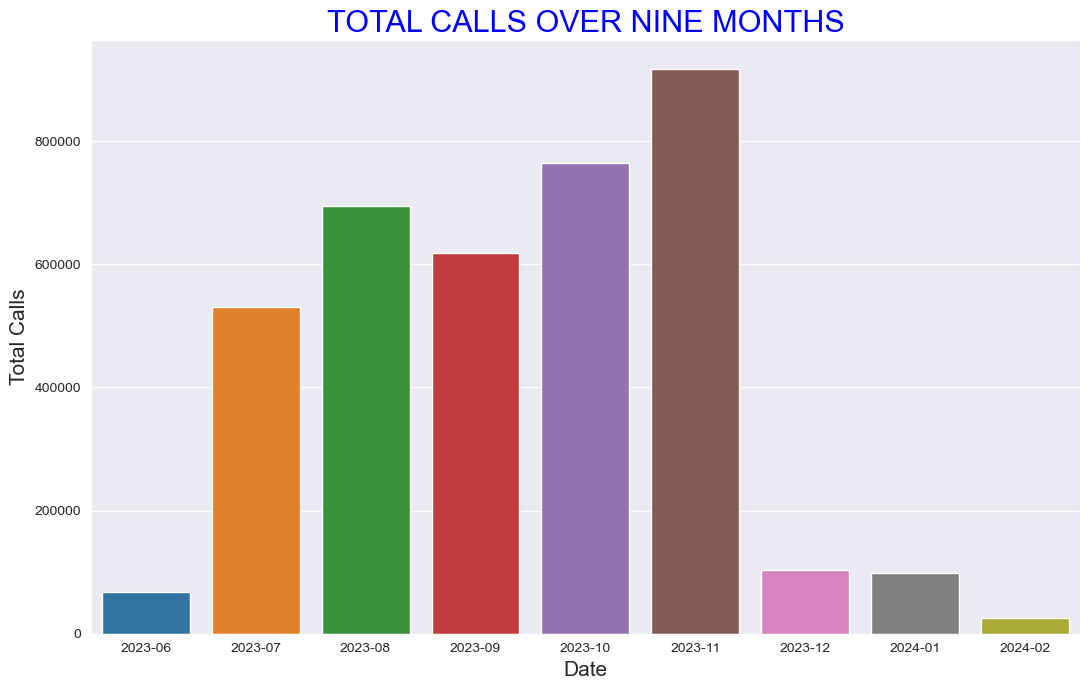

In [90]:
plt.figure(figsize=(11, 7))
sns.set_style('darkgrid')
sns.despine
sns.barplot(x = 'date_captured', y="total_calls", data = total_calls_per_month_9)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Total Calls", fontsize=15)
plt.title("TOTAL CALLS OVER NINE MONTHS", fontsize=22, color="b")
plt.tight_layout()

### Success Rate Over Three Months

In [91]:
success_per_month_3 = api_three_months_df.groupby(["date_captured"], as_index=False).agg({"success": pd.Series.sum})
success_per_month_3

,date_captured,success
0,2023-11,780853
1,2023-12,1185801
2,2024-01,1696748
3,2024-02,794627


### Success Rate Over Nine Months

In [92]:
success_per_month_9 = api_nine_months_df.groupby(["date_captured"], as_index=False).agg({"success": pd.Series.sum})
success_per_month_9

,date_captured,success
0,2023-06,49104
1,2023-07,291399
2,2023-08,461347
3,2023-09,425998
4,2023-10,632237
5,2023-11,780853
6,2023-12,1185801
7,2024-01,1696748
8,2024-02,794627


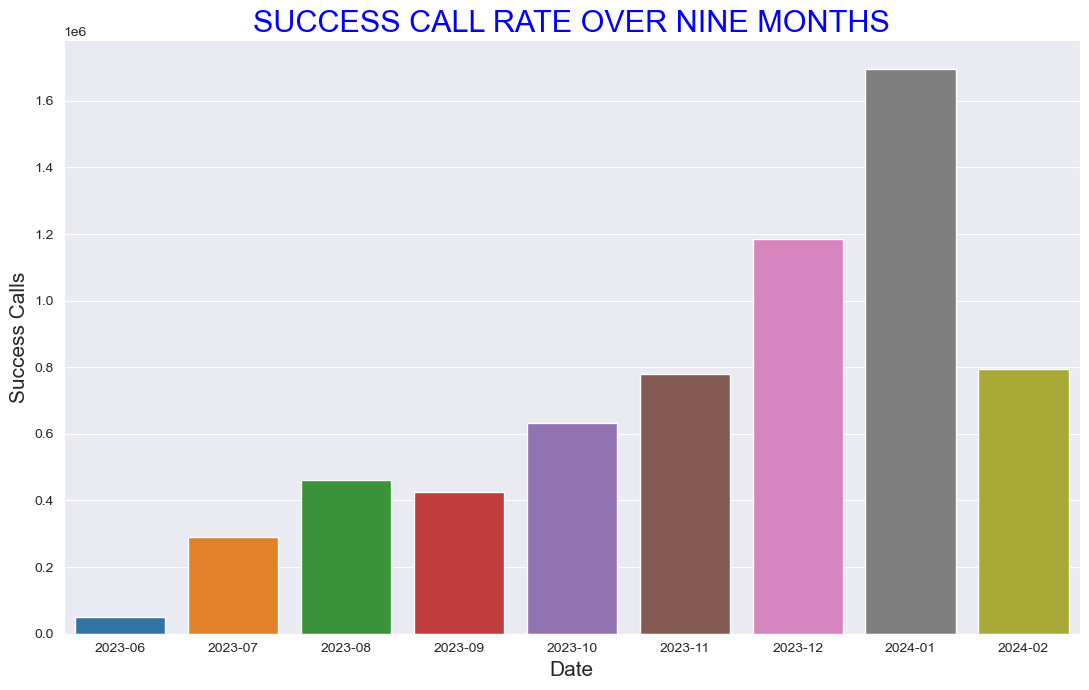

In [93]:
# Sucess rate monthly distribution over six months

plt.figure(figsize=(11, 7))
sns.barplot(x = 'date_captured', y="success", data = success_per_month_9)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Success Calls", fontsize=15)
plt.title("SUCCESS CALL RATE OVER NINE MONTHS", fontsize=22, color="b")
plt.tight_layout()

In [94]:
merged_stats_success = total_calls_per_month_9.copy()
merged_stats_success["success"] = success_per_month_9["success"]
merged_stats_success['success_percentage'] = (merged_stats_success['success'] / merged_stats_success['total_calls']) * 100
merged_stats_success

,date_captured,total_calls,success,success_percentage
0,2023-06,68436,49104,71.75
1,2023-07,531448,291399,54.83
2,2023-08,694855,461347,66.39
3,2023-09,617801,425998,68.95
4,2023-10,764717,632237,82.68
5,2023-11,917914,780853,85.07
6,2023-12,103155,1185801,1149.53
7,2024-01,97992,1696748,1731.52
8,2024-02,24773,794627,3207.63


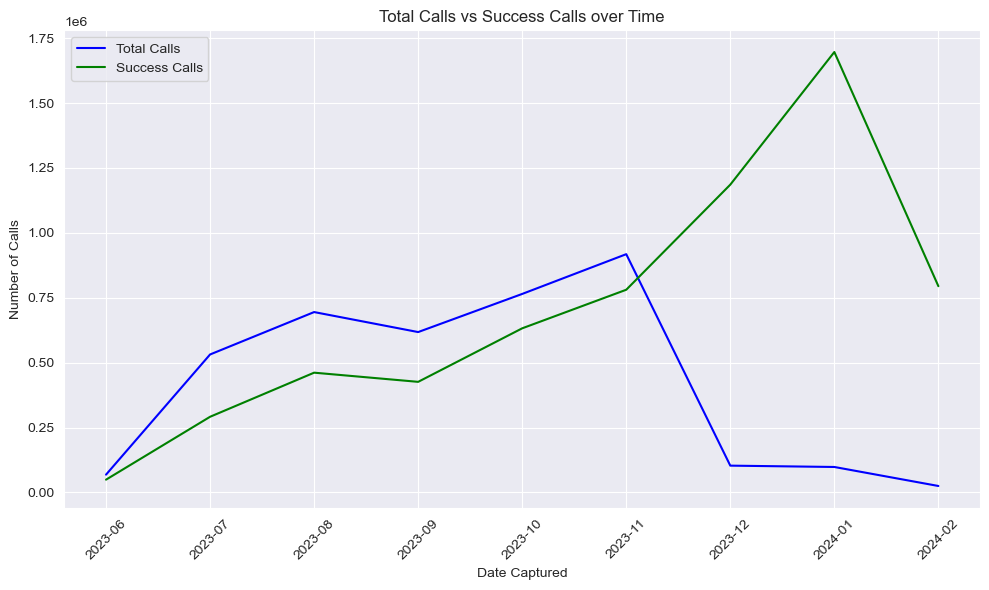

In [95]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(merged_stats_success.date_captured, merged_stats_success['total_calls'], label='Total Calls', color='blue')
plt.plot(merged_stats_success.date_captured, merged_stats_success['success'], label='Success Calls', color='green')
plt.xlabel('Date Captured')
plt.ylabel('Number of Calls')
plt.title('Total Calls vs Success Calls over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Revenue Rate Over Three Months

In [96]:
revenue_per_month_3 = api_three_months_df.groupby(["date_captured"], as_index=False).agg({"revenue": pd.Series.sum})
revenue_per_month_3

,date_captured,revenue
0,2023-11,47513012.74
1,2023-12,39023006.72
2,2024-01,41984916.80
3,2024-02,4027768.67


### Revenue Rate Over Nine Months

In [97]:
revenue_per_month_9 = api_nine_months_df.groupby(["date_captured"], as_index=False).agg({"revenue": pd.Series.sum})
revenue_per_month_9

,date_captured,revenue
0,2023-06,1250818.00
1,2023-07,11915122.27
2,2023-08,19737974.15
3,2023-09,19253972.23
4,2023-10,33875353.54
5,2023-11,47513012.74
6,2023-12,39023006.72
7,2024-01,41984916.80
8,2024-02,4027768.67


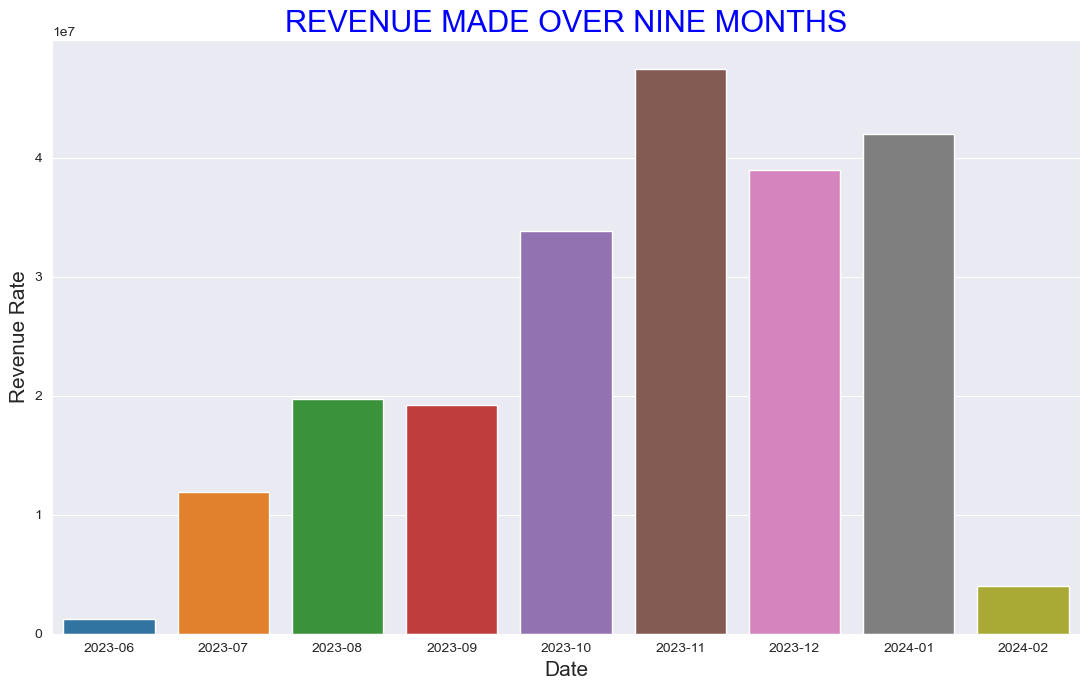

In [98]:
plt.figure(figsize=(11, 7))
sns.barplot(x = 'date_captured', y="revenue", data = revenue_per_month_9)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Revenue Rate", fontsize=15)
plt.title("REVENUE MADE OVER NINE MONTHS", fontsize=22, color="b")
plt.tight_layout()

In [99]:
merged_stats_revenue = total_calls_per_month_9.copy()
merged_stats_revenue["revenue"] = revenue_per_month_9["revenue"]
merged_stats_revenue['revenue_percentage'] = (merged_stats_revenue['revenue'] / merged_stats_success['total_calls']) * 100
merged_stats_revenue

,date_captured,total_calls,revenue,revenue_percentage
0,2023-06,68436,1250818.00,1827.72
1,2023-07,531448,11915122.27,2242.01
2,2023-08,694855,19737974.15,2840.59
3,2023-09,617801,19253972.23,3116.53
4,2023-10,764717,33875353.54,4429.79
5,2023-11,917914,47513012.74,5176.19
6,2023-12,103155,39023006.72,37829.49
7,2024-01,97992,41984916.80,42845.25
8,2024-02,24773,4027768.67,16258.70


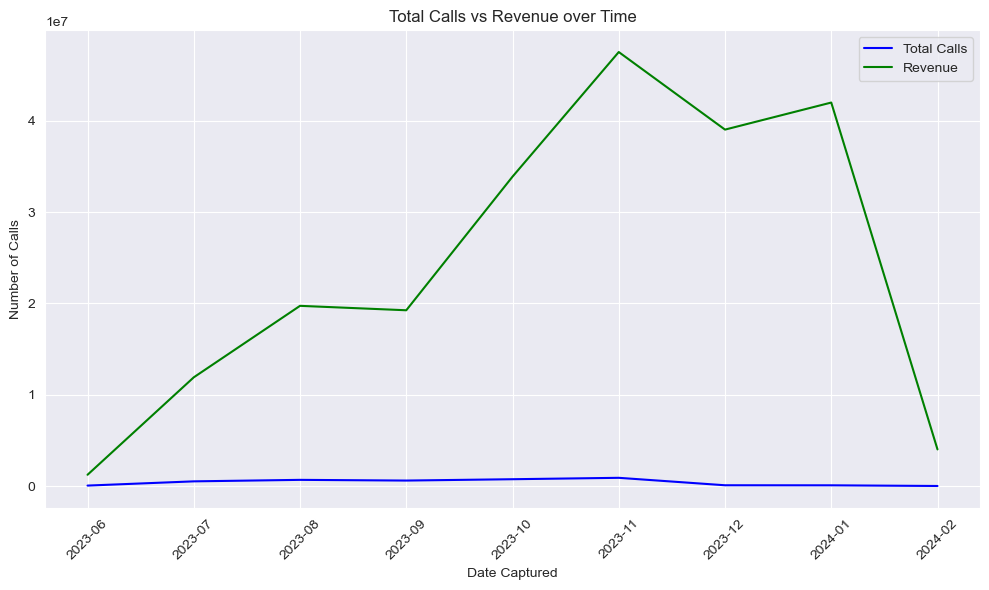

In [100]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(merged_stats_revenue.date_captured, merged_stats_revenue['total_calls'], label='Total Calls', color='blue')
plt.plot(merged_stats_revenue.date_captured, merged_stats_revenue['revenue'], label='Revenue', color='green')
plt.xlabel('Date Captured')
plt.ylabel('Number of Calls')
plt.title('Total Calls vs Revenue over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Server Error Rate Over Three Months

In [101]:
server_error_per_month_3 = api_three_months_df.groupby(["date_captured"], as_index=False).agg({"server_error": pd.Series.sum})
server_error_per_month_3

,date_captured,server_error
0,2023-11,55068
1,2023-12,216983
2,2024-01,184567
3,2024-02,101505


### Server Error Rate Over Nine Months

In [102]:
server_error_per_month_9 = api_nine_months_df.groupby(["date_captured"], as_index=False).agg({"server_error": pd.Series.sum})
server_error_per_month_9

,date_captured,server_error
0,2023-06,3772
1,2023-07,36594
2,2023-08,56215
3,2023-09,82031
4,2023-10,40333
5,2023-11,55068
6,2023-12,216983
7,2024-01,184567
8,2024-02,101505


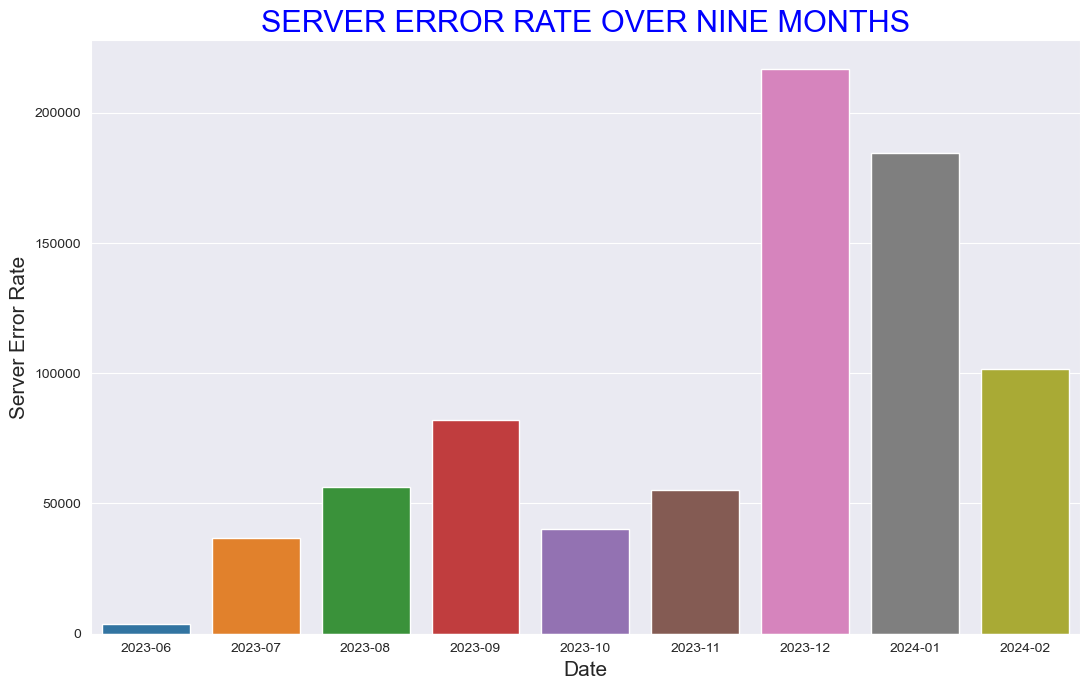

In [103]:
plt.figure(figsize=(11, 7))
sns.barplot(x = 'date_captured', y="server_error", data = server_error_per_month_9)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Server Error Rate", fontsize=15)
plt.title("SERVER ERROR RATE OVER NINE MONTHS", fontsize=22, color="b")
plt.tight_layout()

In [104]:
merged_stats_server_error = total_calls_per_month_9.copy()
merged_stats_server_error["server_error"] = server_error_per_month_9["server_error"]
merged_stats_server_error['server_error_percentage'] = (merged_stats_server_error['server_error'] / merged_stats_server_error['total_calls']) * 100
merged_stats_server_error

,date_captured,total_calls,server_error,server_error_percentage
0,2023-06,68436,3772,5.51
1,2023-07,531448,36594,6.89
2,2023-08,694855,56215,8.09
3,2023-09,617801,82031,13.28
4,2023-10,764717,40333,5.27
5,2023-11,917914,55068,6.00
6,2023-12,103155,216983,210.35
7,2024-01,97992,184567,188.35
8,2024-02,24773,101505,409.74


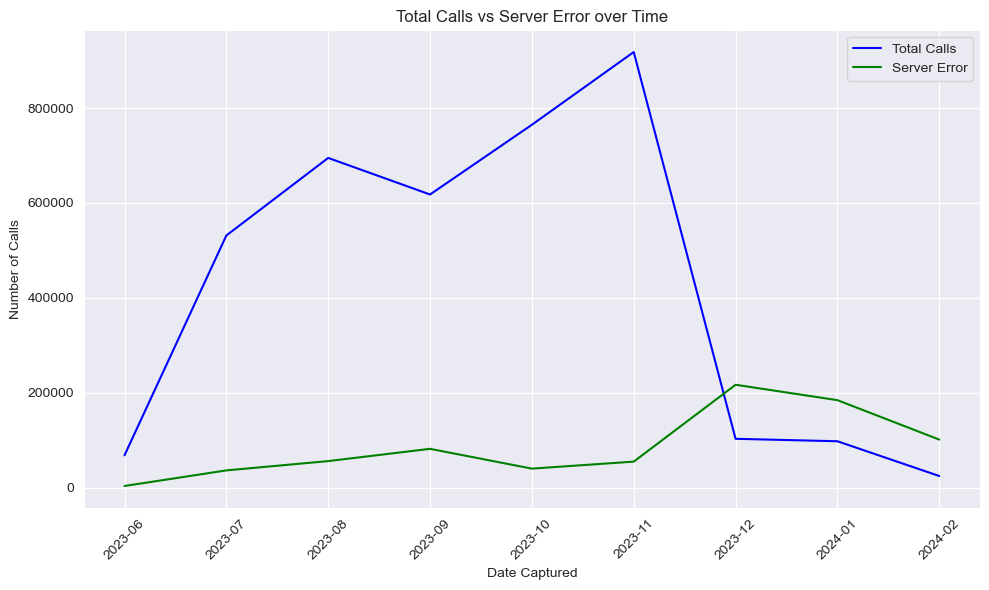

In [105]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(merged_stats_server_error.date_captured, merged_stats_server_error['total_calls'], label='Total Calls', color='blue')
plt.plot(merged_stats_server_error.date_captured, merged_stats_server_error['server_error'], label='Server Error', color='green')
plt.xlabel('Date Captured')
plt.ylabel('Number of Calls')
plt.title('Total Calls vs Server Error over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### No Record Rate Over Three Months

In [106]:
no_record_per_month_3 = api_three_months_df.groupby(["date_captured"], as_index=False).agg({"no_record": pd.Series.sum})
no_record_per_month_3

,date_captured,no_record
0,2023-11,331875
1,2023-12,1142819
2,2024-01,1078807
3,2024-02,178103


### No Record Rate Over Nine Months 

In [107]:
no_record_per_month_9 = api_nine_months_df.groupby(["date_captured"], as_index=False).agg({"no_record": pd.Series.sum})
no_record_per_month_9

,date_captured,no_record
0,2023-06,13062
1,2023-07,111557
2,2023-08,169097
3,2023-09,120130
4,2023-10,269143
5,2023-11,331875
6,2023-12,1142819
7,2024-01,1078807
8,2024-02,178103


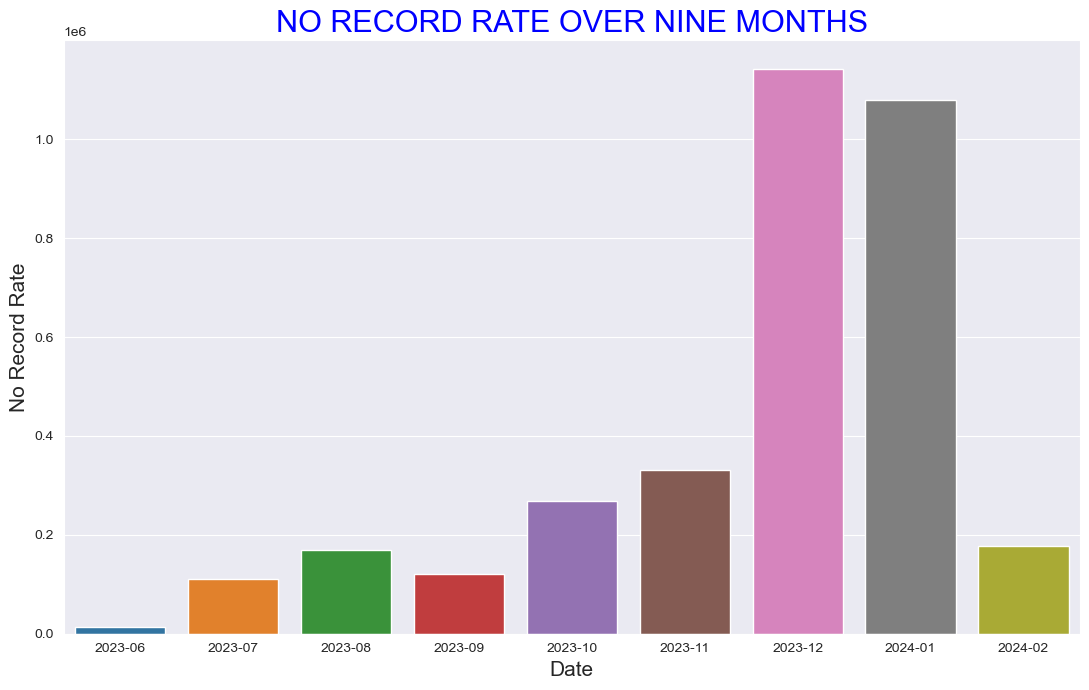

In [108]:
plt.figure(figsize=(11, 7))
sns.barplot(x = 'date_captured', y="no_record", data = no_record_per_month_9)
plt.xlabel("Date", fontsize=15)
plt.ylabel("No Record Rate", fontsize=15)
plt.title("NO RECORD RATE OVER NINE MONTHS", fontsize=22, color="b")
plt.tight_layout()

In [109]:
merged_stats_no_record = total_calls_per_month_9.copy()
merged_stats_no_record["no_record"] = no_record_per_month_9["no_record"]
merged_stats_no_record['no_record_percentage'] = (merged_stats_no_record['no_record'] / merged_stats_no_record['total_calls']) * 100
merged_stats_no_record

,date_captured,total_calls,no_record,no_record_percentage
0,2023-06,68436,13062,19.09
1,2023-07,531448,111557,20.99
2,2023-08,694855,169097,24.34
3,2023-09,617801,120130,19.44
4,2023-10,764717,269143,35.20
5,2023-11,917914,331875,36.16
6,2023-12,103155,1142819,1107.87
7,2024-01,97992,1078807,1100.91
8,2024-02,24773,178103,718.94


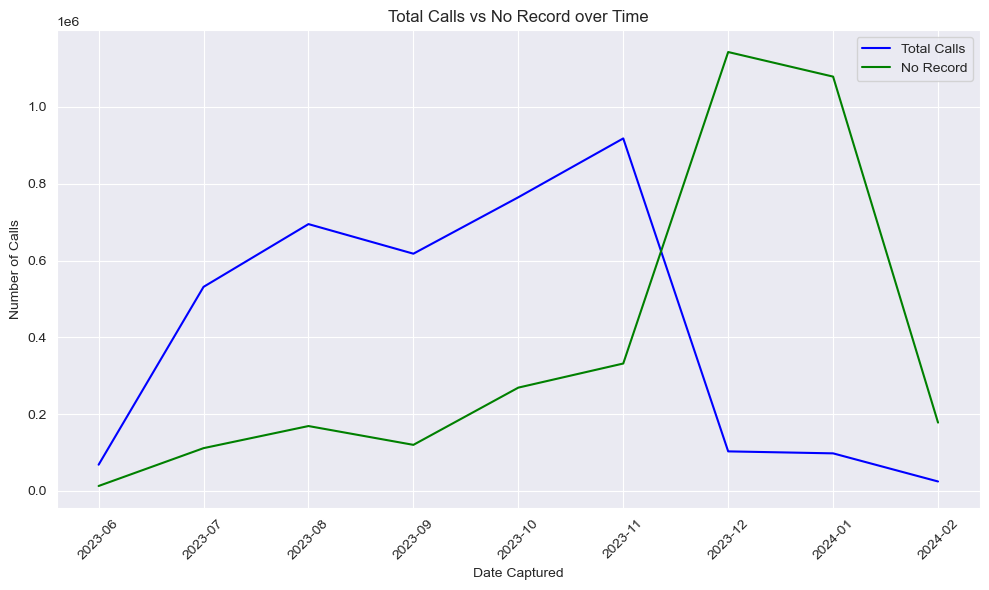

In [110]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(merged_stats_no_record.date_captured, merged_stats_no_record['total_calls'], label='Total Calls', color='blue')
plt.plot(merged_stats_no_record.date_captured, merged_stats_no_record['no_record'], label='No Record', color='green')
plt.xlabel('Date Captured')
plt.ylabel('Number of Calls')
plt.title('Total Calls vs No Record over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Correlation Analysis

- PairPlot correlation
- Heatmap correlation

### Three Months PairPlot Correlation

<Figure size 1000x800 with 0 Axes>

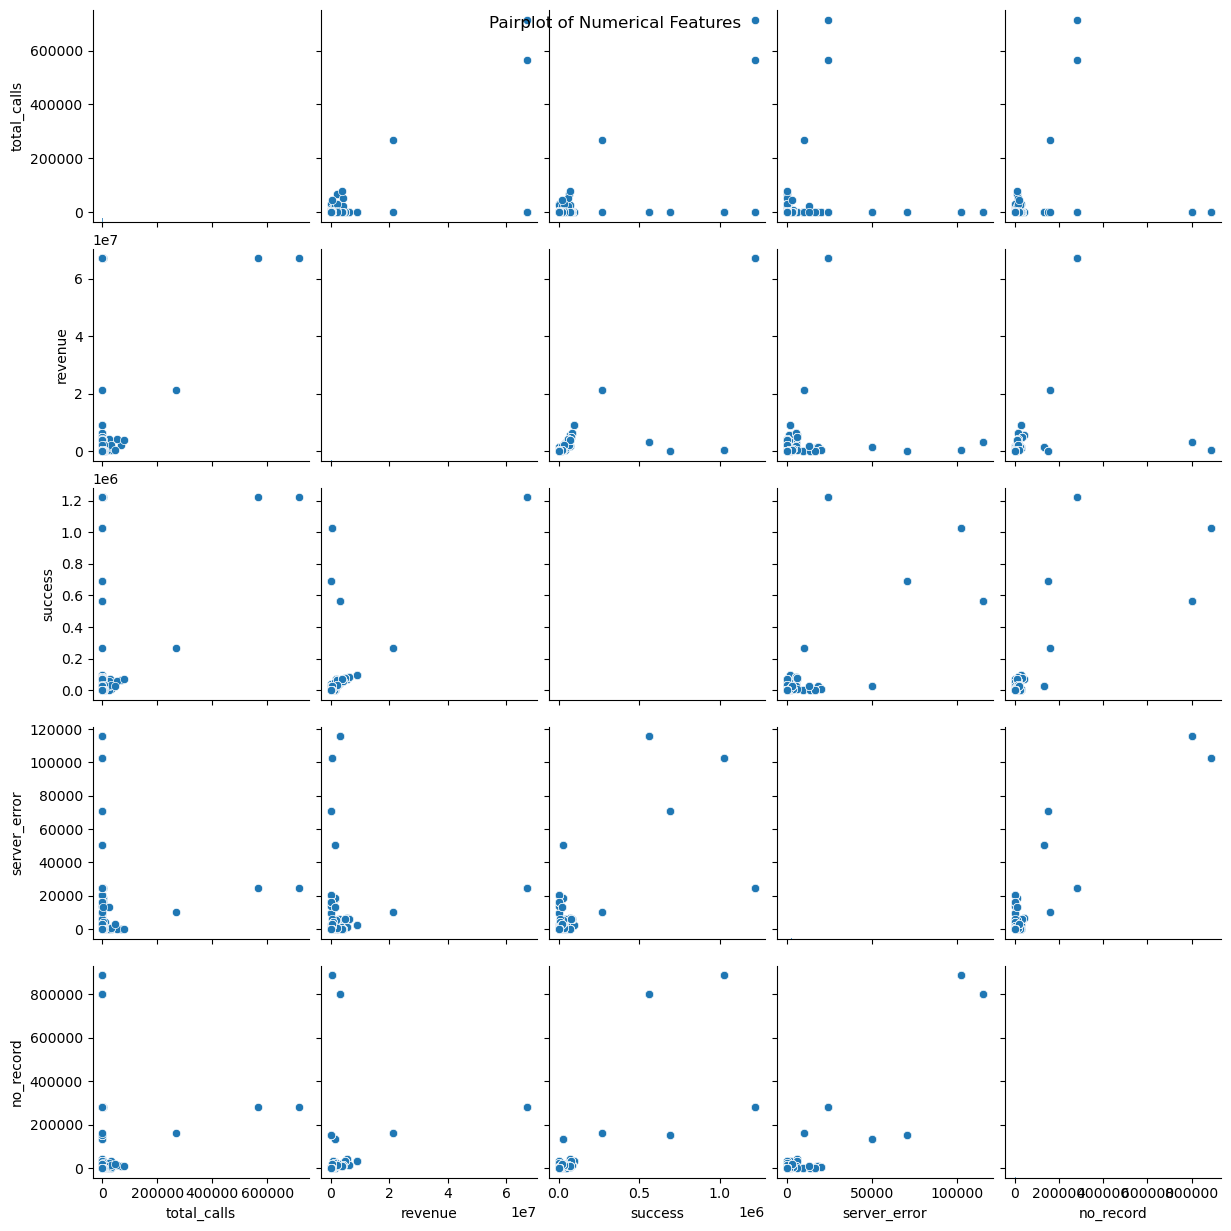

In [295]:
plt.figure(figsize=(9, 7))
sns.pairplot(api_three_months_df[['revenue', 'success', 'server_error', 'no_record']], kind='scatter')
plt.suptitle('Pairplot of Numerical Features')
plt.show()

### Three Months HeatMap Correlation

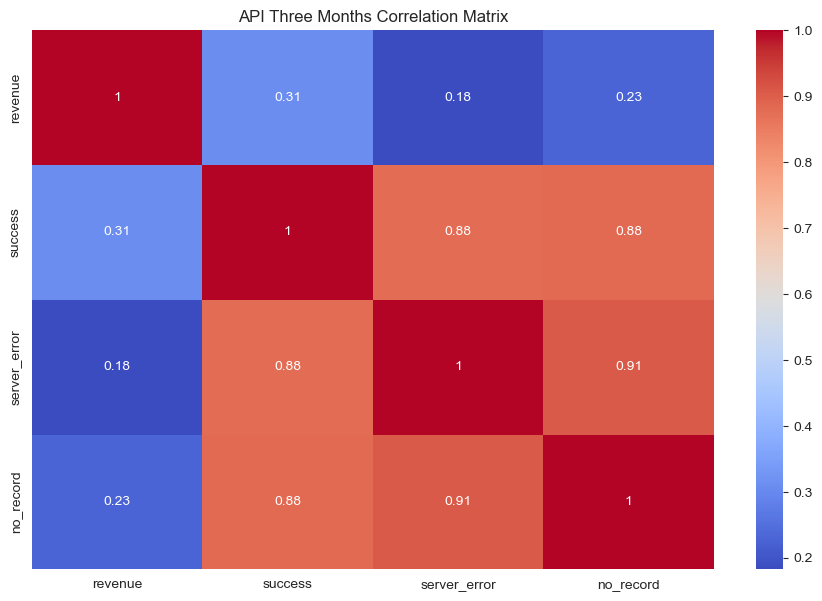

In [111]:
plt.figure(figsize=(11, 7))
correlation_matrix = api_three_months_df[['revenue', 'success', 'server_error', 'no_record']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('API Three Months Correlation Matrix')
plt.show()

### Nine Months Pairplot Correlation

In [ ]:
plt.figure(figsize=(9, 7))
sns.pairplot(api_six_months_df[['revenue', 'success', 'server_error', 'no_record']], kind='scatter')
plt.suptitle('Pairplot of Numerical Features')
plt.show()

### Nine Months Heatmap Correlation

In [112]:
plt.figure(figsize=(11, 7))
correlation_matrix = api_six_months_df[['revenue', 'success', 'server_error', 'no_record']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('API Six Months Correlation Matrix')
plt.show()

NameError: name 'api_six_months_df' is not defined

<Figure size 1100x700 with 0 Axes>

## Customer Segmentation By Country

- Three Months customer distribution
- Six Months customer distribution

### Customer Distribution by Country Over Three Months

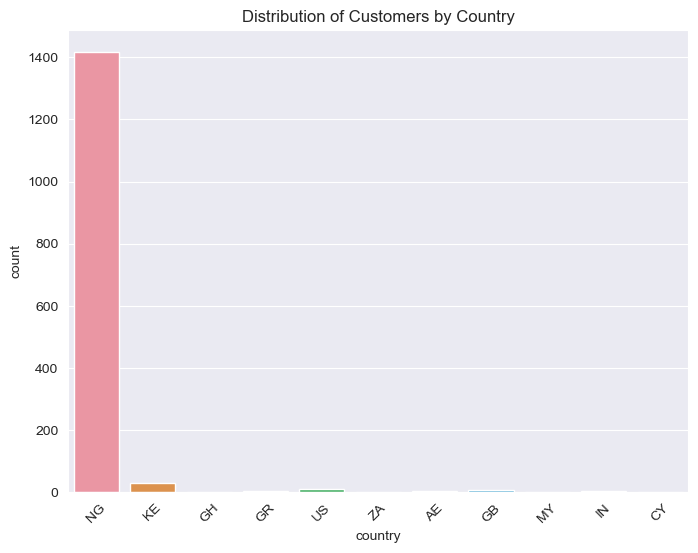

In [113]:
plt.figure(figsize=(8, 6))
sns.countplot(x='country', data=api_three_months_df)
plt.title('Distribution of Customers by Country')
plt.xticks(rotation=45)
plt.show()

### Customer Distribution by Country Over Six Months

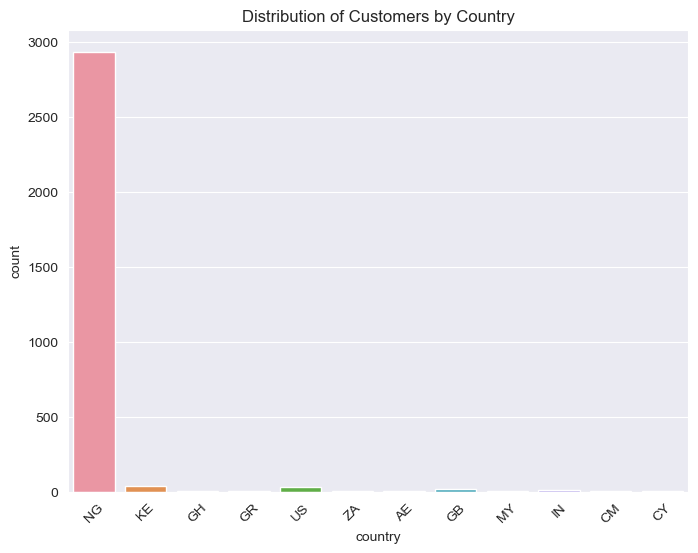

In [115]:
plt.figure(figsize=(8, 6))
sns.countplot(x='country', data=api_nine_months_df)
plt.title('Distribution of Customers by Country')
plt.xticks(rotation=45)
plt.show()

# Customer Behaviour Over Nine Months

In [117]:
print(endpoint_nine_months_df.shape)
print(api_nine_months_df.shape)

(7944, 7)
(3037, 10)


### Generate stats by each Business
- total number of calls by business

In [437]:
endpoint_nine_months_dff = endpoint_six_months_df.copy()
endpoint_six_months_dff["num_of_calls"] = endpoint_six_months_dff["total_calls"]
calls_by_business_6 = endpoint_six_months_dff.groupby(["org_id", "business_name"], as_index=False).agg({"total_calls": pd.Series.sum, "num_of_calls": pd.Series.count})
print(calls_by_business_6.shape)
print()
calls_by_business_6.head()

(590, 4)



,org_id,business_name,total_calls,num_of_calls
0,007bee1d-8c43-480d-92d0-345f489277b0,Trybookings Nigeria Limited,32,8
1,00991371-e050-4115-af48-999862fad9e8,Cydene Energy Services,104,6
2,00d3395c-76d1-4f27-b75f-fae4f6b32f28,RoutePay Fintech Limited,19,12
3,00f3f38d-6d9e-41b0-aeea-ebd6e2adf8bd,MarvDav Digital Concept,6,4
4,016a3177-bcad-465f-ae30-4efc006eecbf,Subbs Services Limited,2,2


In [560]:
# api_merchant_excel = pd.merge(calls_by_business_6, merchant_df, on=["org_id", "business_name"], how="outer")
# api_merchant_excel = api_merchant_excel.fillna("does_not_exist")
# merchant_api_excel = api_merchant_excel[api_merchant_excel["email"] == "does_not_exist"]
# api_merchant_excel = api_merchant_excel[api_merchant_excel["num_of_calls"] == "does_not_exist"]

# print(api_merchant_excel.shape)
# print(merchant_api_excel.shape)

# file_path_1 = 'api_merchant_excel.xlsx'
# file_path_2 = 'merchant_api_excel.xlsx'
# api_merchant_excel.to_excel(file_path_1, index=False)
# merchant_api_excel.to_excel(file_path_2, index=False)

In [551]:
checking_for.head(3)

,org_id,business_name,total_calls_x,num_of_calls_x,total_calls_y,num_of_calls_y,country,currency,verified_sector,platform,date_created,lead_source,business_document,email,phone,status
0,007bee1d-8c43-480d-92d0-345f489277b0,Trybookings Nigeria Limited,32,8,32.00,8.00,NG,NGN,no sector identified,PREMBLY,2023-06-01 00:00:00,no-referral,uploaded,temitopeolotin@tryspacely.com,2.35E+12,active
1,00991371-e050-4115-af48-999862fad9e8,Cydene Energy Services,104,6,104.00,6.00,NG,NGN,identified,PREMBLY,2023-08-01 00:00:00,no-referral,uploaded,express@cydene.com,9081111104,active
2,00d3395c-76d1-4f27-b75f-fae4f6b32f28,RoutePay Fintech Limited,19,12,19.00,12.00,NG,NGN,identified,PREMBLY,2023-08-01 00:00:00,no-referral,uploaded,olushola.daramola@routepay.com,2.35E+12,active


In [438]:
check_merchant_df = merchant_df.copy()
check_merchant_df = pd.merge(calls_by_business_6, check_merchant_df, on=["org_id", "business_name"], how="inner")
check_merchant_df["date_created"] = pd.to_datetime(check_merchant_df["date_created"])
check_merchant_df['date_created'] = check_merchant_df['date_created'].dt.strftime('%Y-%m')
check_merchant_df["date_created"] = pd.to_datetime(check_merchant_df["date_created"])
print(check_merchant_df.shape)
print()
check_merchant_df.head(2)

(579, 13)



,org_id,business_name,total_calls,num_of_calls,country,currency,verified_sector,platform,date_created,lead_source,business_document,email,phone
0,007bee1d-8c43-480d-92d0-345f489277b0,Trybookings Nigeria Limited,32,8,NG,NGN,no sector identified,PREMBLY,2023-06-01,no-referral,uploaded,temitopeolotin@tryspacely.com,2.35E+12
1,00991371-e050-4115-af48-999862fad9e8,Cydene Energy Services,104,6,NG,NGN,identified,PREMBLY,2023-08-01,no-referral,uploaded,express@cydene.com,9081111104


### Six Months Customer Segmentation by Activity

In [439]:
calls_by_business_6.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_calls,590.00,6434.44,37079.08,1.00,11.00,55.50,379.75,488451.00
num_of_calls,590.00,12.64,13.48,1.00,4.00,8.00,17.00,89.00


In [440]:
set_date = '2024-01'
set_date = datetime.strptime(set_date, '%Y-%m')

def segmentation(data):

    if data['total_calls'] >  379 and data['num_of_calls'] > 16:
        return 'super active'
    elif data['total_calls'] > 55 and data['num_of_calls'] > 7:
        return "very active"
    elif data['total_calls'] > 10 and data['num_of_calls'] > 3:
        return "active"
    elif data['total_calls'] > 1 or data["num_of_calls"] > 1:
        return "half active"
    else:
        if data["date_created"] < set_date:
            return "Churn"
        else:
            return "half active"
    
    
check_merchant_df["status"] = check_merchant_df.apply(segmentation, axis=1)
print(check_merchant_df.shape)
print()
check_merchant_df.head(2)

(579, 14)



,org_id,business_name,total_calls,num_of_calls,country,currency,verified_sector,platform,date_created,lead_source,business_document,email,phone,status
0,007bee1d-8c43-480d-92d0-345f489277b0,Trybookings Nigeria Limited,32,8,NG,NGN,no sector identified,PREMBLY,2023-06-01,no-referral,uploaded,temitopeolotin@tryspacely.com,2.35E+12,active
1,00991371-e050-4115-af48-999862fad9e8,Cydene Energy Services,104,6,NG,NGN,identified,PREMBLY,2023-08-01,no-referral,uploaded,express@cydene.com,9081111104,active


very active     160
active          157
half active     151
super active     83
Churn            28
Name: status, dtype: int64



<AxesSubplot:xlabel='status', ylabel='count'>

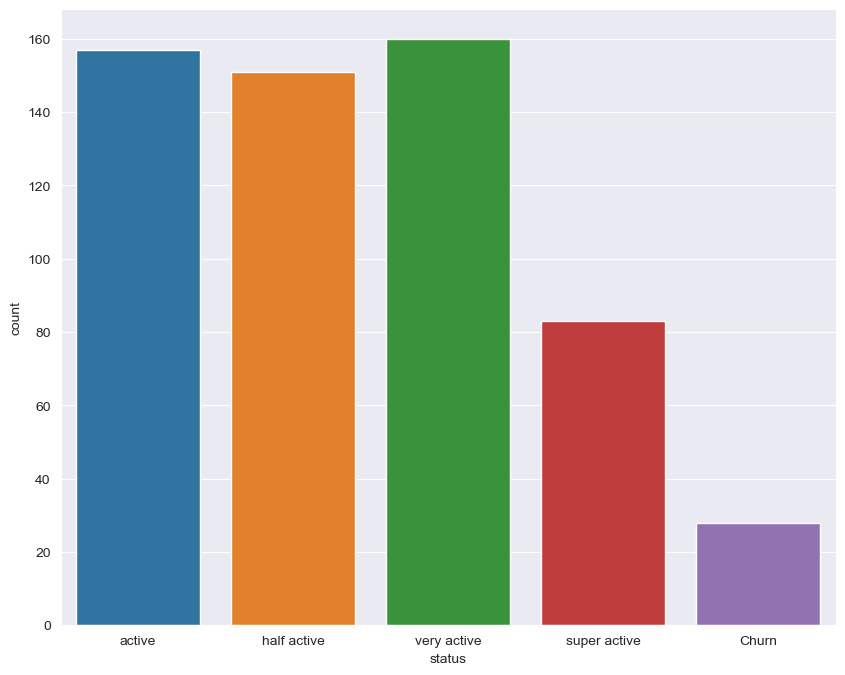

In [444]:
print(check_merchant_df.status.value_counts())
print()
plt.figure(figsize=(10, 8))
sns.countplot(data=check_merchant_df, x="status")

In [465]:
potential_churns_6_months = check_merchant_df[(check_merchant_df['status'] == "Churn")]
print(potential_churns_6_months.shape)
print()
potential_churns_6_months.head(2)

(28, 14)



,org_id,business_name,total_calls,num_of_calls,country,currency,verified_sector,platform,date_created,lead_source,business_document,email,phone,status
76,24062595-b4d1-40e2-aa38-b7e81ce00227,ShipPack,1,1,NG,NGN,identified,PREMBLY,2023-10-01,referal,uploaded,oigbinedion@theshippack.com,7051440039,Churn
80,27777c64-9d1e-41e3-95c0-b30259a3af2d,KOBOGO NIGERIA LIMITED,1,1,NG,NGN,identified,PREMBLY,2023-09-01,referal,uploaded,info@kif-finance.com,2.35E+12,Churn


In [443]:
api_six_months_dff = api_six_months_df.copy()
stats_by_business_6 = api_six_months_dff.groupby(["org_id", "business_name"], as_index=False).agg({"success": pd.Series.sum, "server_error": pd.Series.sum, "no_record": pd.Series.sum, "revenue": pd.Series.sum})
print(stats_by_business_6.shape)
print()
stats_by_business_6.head(2)

(625, 6)



,org_id,business_name,success,server_error,no_record,revenue
0,007bee1d-8c43-480d-92d0-345f489277b0,Trybookings Nigeria Limited,20,0,18,440.00
1,00991371-e050-4115-af48-999862fad9e8,Cydene Energy Services,103,0,1,3220.00


In [445]:
potential_churns_6_months = pd.merge(potential_churns_6_months, stats_by_business_6, on=["org_id", "business_name"], how='inner')
print(potential_churns_6_months.shape)
print()
potential_churns_6_months.head(2)

(28, 18)



,org_id,business_name,total_calls,num_of_calls,country,currency,verified_sector,platform,date_created,lead_source,business_document,email,phone,status,success,server_error,no_record,revenue
0,24062595-b4d1-40e2-aa38-b7e81ce00227,ShipPack,1,1,NG,NGN,identified,PREMBLY,2023-10-01,referal,uploaded,oigbinedion@theshippack.com,7051440039,Churn,1,10,14,15.00
1,27777c64-9d1e-41e3-95c0-b30259a3af2d,KOBOGO NIGERIA LIMITED,1,1,NG,NGN,identified,PREMBLY,2023-09-01,referal,uploaded,info@kif-finance.com,2.35E+12,Churn,1,0,0,1.00


<AxesSubplot:xlabel='status', ylabel='count'>

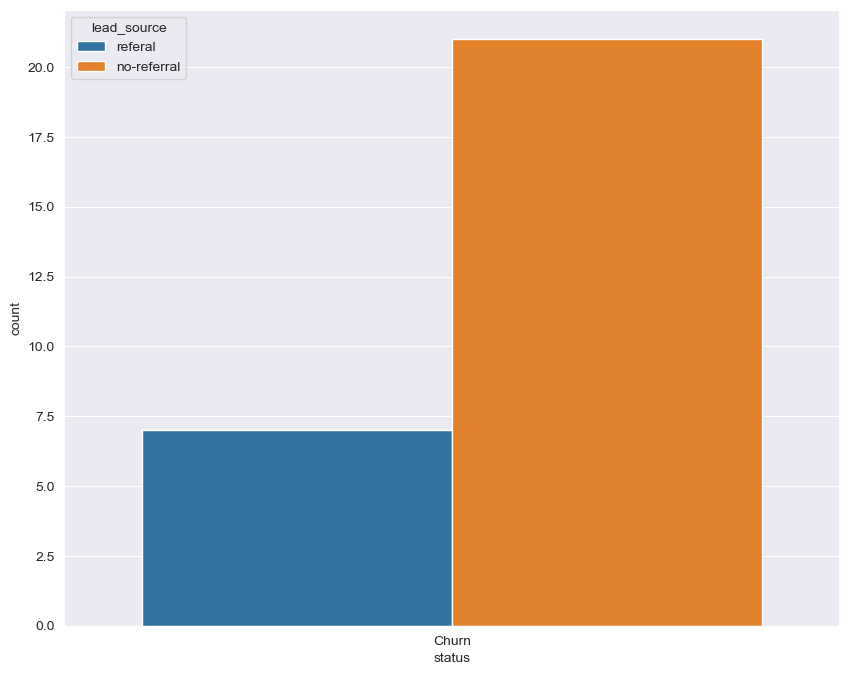

In [452]:
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(10, 8))
sns.countplot(data=potential_churns_6_months, x="status", hue="lead_source")

<AxesSubplot:xlabel='status', ylabel='count'>

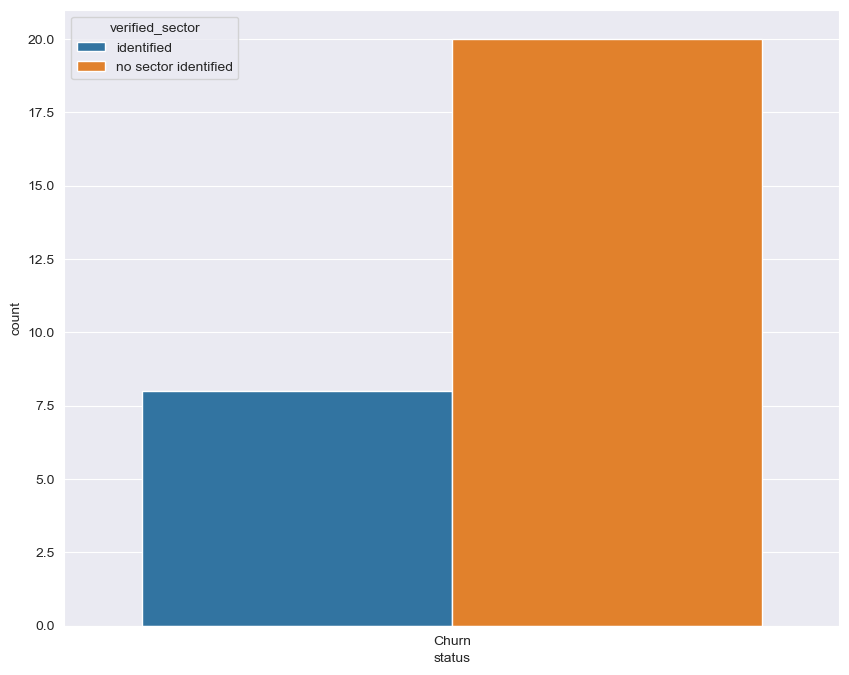

In [453]:
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(10, 8))
sns.countplot(data=potential_churns_6_months, x="status", hue="verified_sector")

<AxesSubplot:xlabel='status', ylabel='count'>

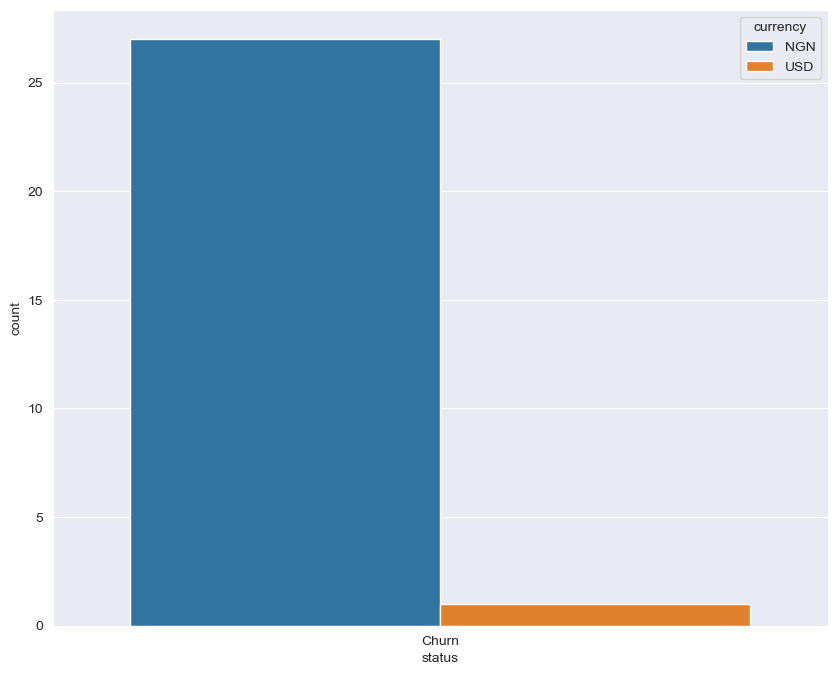

In [526]:
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(10, 8))
sns.countplot(data=potential_churns_6_months, x="status", hue="currency")

<AxesSubplot:xlabel='status', ylabel='count'>

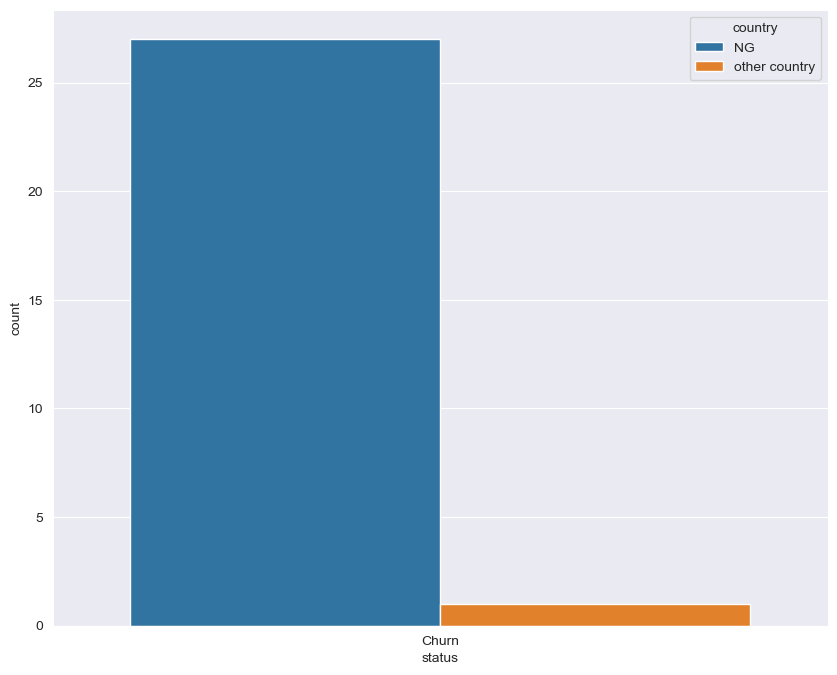

In [527]:
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(10, 8))
sns.countplot(data=potential_churns_6_months, x="status", hue="country")

# Customer Behaviour Over Three Months

In [457]:
print(endpoint_three_months_df.shape)
print(api_three_months_df.shape)

(2932, 6)
(1185, 10)


### Generate stats by each Business

- Total number of calls by business

In [458]:
endpoint_three_months_dff = endpoint_three_months_df.copy()
endpoint_three_months_dff["num_of_calls"] = endpoint_three_months_dff["total_calls"]
calls_by_business_3 = endpoint_three_months_dff.groupby(["org_id", "business_name"], as_index=False).agg({"total_calls": pd.Series.sum, "num_of_calls": pd.Series.count})
print(calls_by_business_3.shape)
print()
calls_by_business_3.head(2)

(468, 4)



,org_id,business_name,total_calls,num_of_calls
0,007bee1d-8c43-480d-92d0-345f489277b0,Trybookings Nigeria Limited,9,3
1,00991371-e050-4115-af48-999862fad9e8,Cydene Energy Services,36,4


In [459]:
check_merchant_df_3 = merchant_df.copy()
check_merchant_df_3 = pd.merge(calls_by_business_3, check_merchant_df_3, on=["org_id", "business_name"], how="inner")
check_merchant_df_3["date_created"] = pd.to_datetime(check_merchant_df_3["date_created"])
check_merchant_df_3['date_created'] = check_merchant_df['date_created'].dt.strftime('%Y-%m')
check_merchant_df_3["date_created"] = pd.to_datetime(check_merchant_df_3["date_created"])
print(check_merchant_df_3.shape)
print()
check_merchant_df_3.head(2)

(459, 13)



,org_id,business_name,total_calls,num_of_calls,country,currency,verified_sector,platform,date_created,lead_source,business_document,email,phone
0,007bee1d-8c43-480d-92d0-345f489277b0,Trybookings Nigeria Limited,9,3,NG,NGN,no sector identified,PREMBLY,2023-06-01,no-referral,uploaded,temitopeolotin@tryspacely.com,2.35E+12
1,00991371-e050-4115-af48-999862fad9e8,Cydene Energy Services,36,4,NG,NGN,identified,PREMBLY,2023-08-01,no-referral,uploaded,express@cydene.com,9081111104


### Three Months Customer Segmentation By Activity

In [460]:
check_merchant_df_3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_calls,459.00,2408.80,15719.14,1.00,8.00,29.00,158.50,267630.00
num_of_calls,459.00,6.28,5.52,1.00,3.00,5.00,8.00,52.00


In [461]:
set_date = '2024-01'
set_date = datetime.strptime(set_date, '%Y-%m')

def segmentation(data):

    if data['total_calls'] >  158 and data['num_of_calls'] > 8:
        return 'super active'
    elif data['total_calls'] > 29 and data['num_of_calls'] > 5:
        return "very active"
    elif data['total_calls'] > 8 and data['num_of_calls'] > 3:
        return "active"
    elif data['total_calls'] > 1 or data["num_of_calls"] > 1:
        return "half active"
    else:
        if data["date_created"] < set_date:
            return "Churn"
        else:
            return "half active"
    
    
check_merchant_df_3["status"] = check_merchant_df_3.apply(segmentation, axis=1)
print(check_merchant_df_3.shape)
print()
check_merchant_df_3.head(2)

(459, 14)



,org_id,business_name,total_calls,num_of_calls,country,currency,verified_sector,platform,date_created,lead_source,business_document,email,phone,status
0,007bee1d-8c43-480d-92d0-345f489277b0,Trybookings Nigeria Limited,9,3,NG,NGN,no sector identified,PREMBLY,2023-06-01,no-referral,uploaded,temitopeolotin@tryspacely.com,2.35E+12,half active
1,00991371-e050-4115-af48-999862fad9e8,Cydene Energy Services,36,4,NG,NGN,identified,PREMBLY,2023-08-01,no-referral,uploaded,express@cydene.com,9081111104,active


In [129]:
print(check_merchant_df_3.status.value_counts())
print()
plt.figure(figsize=(10, 8))
sns.countplot(data=check_merchant_df_3, x="status")

NameError: name 'check_merchant_df_3' is not defined

In [464]:
potential_churns_3_months = check_merchant_df_3[(check_merchant_df_3['status'] == "Churn")]
print(potential_churns_3_months.shape)
print()
potential_churns_3_months.head(2)

(26, 14)



,org_id,business_name,total_calls,num_of_calls,country,currency,verified_sector,platform,date_created,lead_source,business_document,email,phone,status
24,0e76aa85-547a-46a6-b376-a1c6e000f2e6,TechAdvance,1,1,NG,NGN,no sector identified,PREMBLY,2023-06-01,no-referral,uploaded,osagie@techadvance.ng,9066377069,Churn
25,0ea687ee-315f-4f95-8a3f-14276227f7c2,CEPTUA INTERNATIONAL LIMITED,1,1,NG,NGN,no sector identified,PREMBLY,2023-04-01,no-referral,uploaded,jaygoldberg03@gmail.com,2.35E+12,Churn


In [466]:
api_threee_months_dff = api_three_months_df.copy()
stats_by_business_3 = api_three_months_dff.groupby(["org_id", "business_name"], as_index=False).agg({"success": pd.Series.sum, "server_error": pd.Series.sum, "no_record": pd.Series.sum, "revenue": pd.Series.sum})
print(stats_by_business_3.shape)
print()
stats_by_business_3.head(2)

(502, 6)



,org_id,business_name,success,server_error,no_record,revenue
0,007bee1d-8c43-480d-92d0-345f489277b0,Trybookings Nigeria Limited,9,0,1,210.00
1,00991371-e050-4115-af48-999862fad9e8,Cydene Energy Services,36,0,0,1180.00


In [467]:
potential_churns_3_months = pd.merge(potential_churns_3_months, stats_by_business_3, on=["org_id", "business_name"], how='inner')
print(potential_churns_3_months.shape)
print()
potential_churns_3_months.head(2)

(26, 18)



,org_id,business_name,total_calls,num_of_calls,country,currency,verified_sector,platform,date_created,lead_source,business_document,email,phone,status,success,server_error,no_record,revenue
0,0e76aa85-547a-46a6-b376-a1c6e000f2e6,TechAdvance,1,1,NG,NGN,no sector identified,PREMBLY,2023-06-01,no-referral,uploaded,osagie@techadvance.ng,9066377069,Churn,0,0,1,20.00
1,0ea687ee-315f-4f95-8a3f-14276227f7c2,CEPTUA INTERNATIONAL LIMITED,1,1,NG,NGN,no sector identified,PREMBLY,2023-04-01,no-referral,uploaded,jaygoldberg03@gmail.com,2.35E+12,Churn,1,0,2,50.00


In [468]:
# potential_churns_3_months_2 = potential_churns_3_months.drop(["total_calls", "churn"], axis=1)
# potential_churns_3_months_2.corrwith(potential_churns_3_months["total_calls"]).plot.bar(figsize=(16, 9), 
#                                               title="Correlation with Total Calls Column", rot=45, grid=True)

<AxesSubplot:xlabel='status', ylabel='count'>

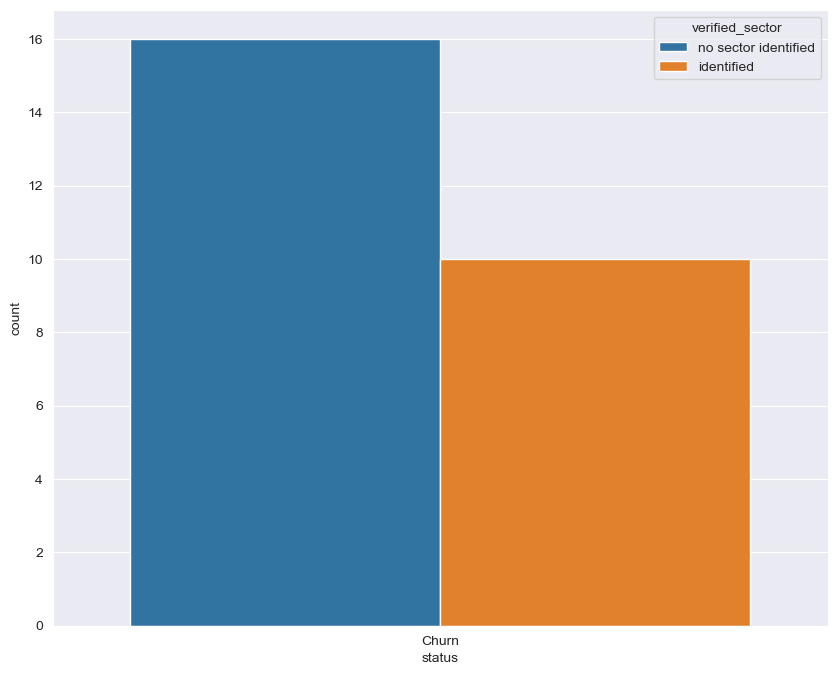

In [567]:
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(10, 8))
sns.countplot(data=potential_churns_3_months, x="status", hue="verified_sector")

<AxesSubplot:xlabel='status', ylabel='count'>

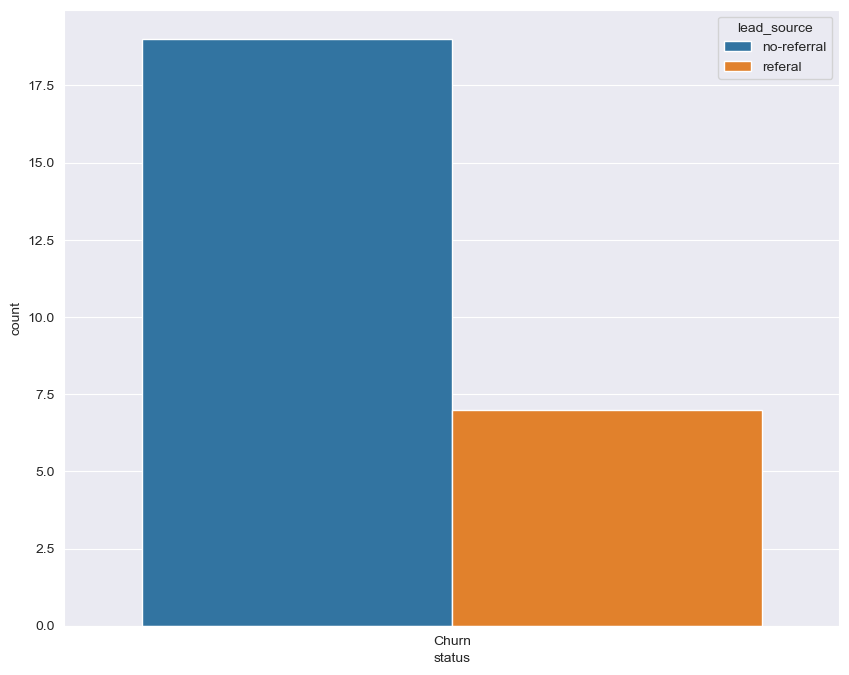

In [470]:
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(10, 8))
sns.countplot(data=potential_churns_3_months, x="status", hue="lead_source")

<AxesSubplot:xlabel='status', ylabel='count'>

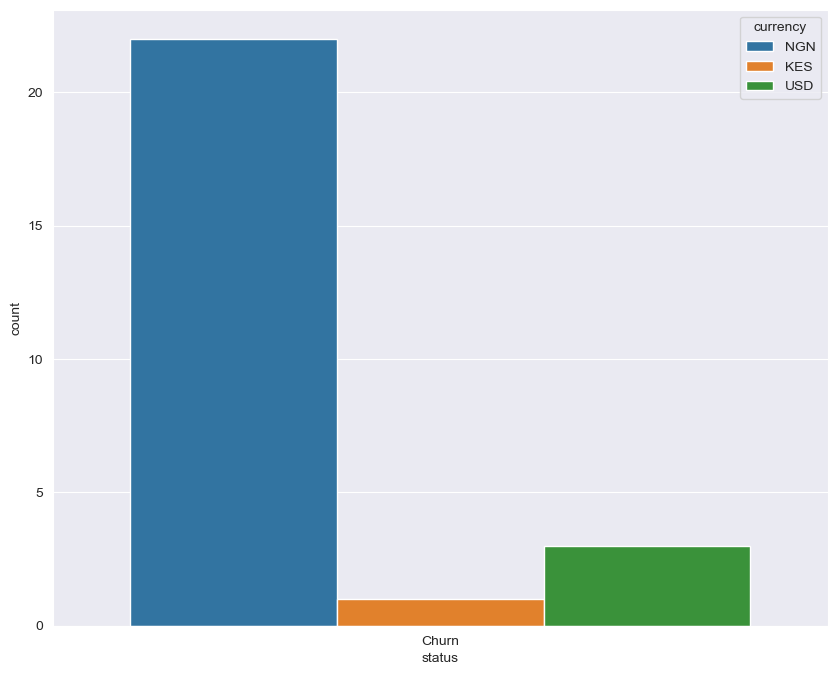

In [523]:
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(10, 8))
sns.countplot(data=potential_churns_3_months, x="status", hue="currency")

<AxesSubplot:xlabel='status', ylabel='count'>

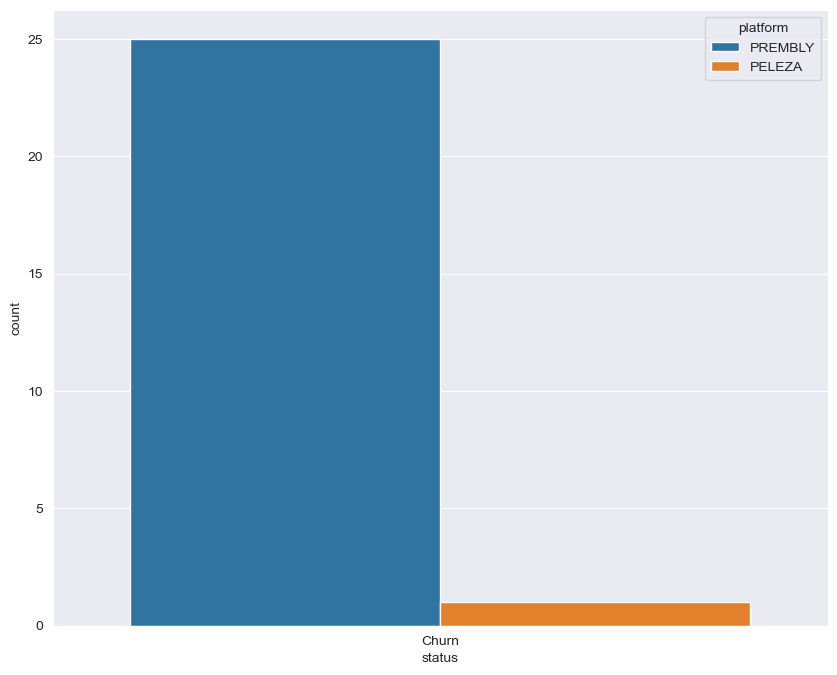

In [525]:
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(10, 8))
sns.countplot(data=potential_churns_3_months, x="status", hue="platform")

# Churned

In [471]:
churn_df = pd.merge(potential_churns_6_months, potential_churns_3_months, on=["org_id", "business_name"], how='inner')
print(churn_df.shape)
print()
churn_df.head()

(9, 30)



,org_id,business_name,total_calls_x,num_of_calls_x,country_x,currency_x,verified_sector_x,platform_x,date_created_x,lead_source_x,...,date_created_y,lead_source_y,business_document_y,email_y,phone_y,status_y,success,server_error,no_record,revenue
0,66f48662-0d67-4977-9d16-c71ad3029c41,Sanergy Limited,1,1,other country,USD,identified,PREMBLY,2023-11-01,referal,...,2023-06-01,referal,uploaded,shalini.kaur@cityfresh.co.ke,788511824,Churn,1,3,1,30.00
1,7ab39506-7fdd-4cc5-b36e-04d6fcb90d40,Rensa Technologies Ltd,1,1,NG,NGN,identified,PREMBLY,2023-09-01,referal,...,2023-06-01,referal,uploaded,josh@getrensa.com,9016214438,Churn,1,3,0,20.00
2,8a50c6c7-5c88-493a-a00b-b5515ff6526f,Softpass Technologies,1,1,NG,NGN,no sector identified,PREMBLY,2023-04-01,no-referral,...,2023-06-01,no-referral,uploaded,temitayo@softpass.net,2.35E+12,Churn,0,0,0,0.00
3,8d632cfd-f2de-4639-90aa-48d26380896e,Reeliv Limited,1,1,NG,NGN,identified,PREMBLY,2023-08-01,no-referral,...,2023-06-01,no-referral,uploaded,hello@reelivafrica.com.ng,8133237162,Churn,1,0,0,70.00
4,a349d9fe-85d1-4be9-aced-f9da991ad2e1,Periculum,1,1,NG,NGN,identified,PREMBLY,2023-09-01,referal,...,2023-06-01,referal,uploaded,tech@periculum.io,8027796660,Churn,1,0,0,30.00


### Setting Three and Six Months Wallet Funding Dataset

In [487]:
wallet_funding_df = wallet_funding.copy()

wallet_funding_df['date_of_transaction'] = pd.to_datetime(wallet_funding_df['date_of_transaction'])
wallet_funding_df['date_of_transaction'] = wallet_funding_df['date_of_transaction'].dt.strftime('%Y-%m')
wallet_funding_df['date_of_transaction'] = pd.to_datetime(wallet_funding_df['date_of_transaction'])
wallet_funding_df = wallet_funding_df.drop(["trans_desc", "previous", "reference", "trans_state", "trans_type"], axis=1)

wallet_three_months_df = wallet_funding_df[(wallet_funding_df['date_of_transaction'] >= three_start_date) & (wallet_funding_df['date_of_transaction'] <= three_end_date)]
wallet_six_months_df = wallet_funding_df[(wallet_funding_df['date_of_transaction'] >= six_start_date) & (wallet_funding_df['date_of_transaction'] <= six_end_date)]

wallet_three_months_df['date_of_transaction'] = wallet_three_months_df['date_of_transaction'].dt.strftime('%Y-%m')
wallet_six_months_df['date_of_transaction'] = wallet_six_months_df['date_of_transaction'].dt.strftime('%Y-%m')

print("Wallet Three Months Dataset: ", wallet_three_months_df.shape)
print()
print("Wallet Six Months Dataset: ", wallet_six_months_df.shape)

Wallet Three Months Dataset:  (1823, 6)

Wallet Six Months Dataset:  (3595, 6)


# Merchant Wallet Behaviour Over Six Months

In [488]:
merchant_wallet_6 = pd.merge(merchant_df, wallet_six_months_df, on=["org_id", "business_name"], how='outer')
merchant_wallet_6 = merchant_wallet_6.fillna(0)
print(merchant_wallet_6.shape)
print()
merchant_wallet_6.head(2)

(4177, 15)



,org_id,business_name,country,currency_x,verified_sector,platform,date_created,lead_source,business_document,email,phone,amount,channel,currency_y,date_of_transaction
0,450b7f93-9de4-46d1-a456-3235c6c0b632,Varens Technologies,NG,NGN,no sector identified,PREMBLY,2023-06,no-referral,uploaded,ini@varens.net,2.35E+12,0.00,0,0,0
1,3f58f27c-b63d-4d5f-a29c-29cddf85797a,Cliqki Technologies,NG,NGN,no sector identified,PREMBLY,2023-06,no-referral,uploaded,yemio@cliqki.com,2.35E+12,0.00,0,0,0


In [510]:
# merchant_wallet_excel = merchant_wallet_6[merchant_wallet_6["date_of_transaction"] == 0]
# print(merchant_wallet_excel.shape)
# file_path = 'merchant_wallet_excel.xlsx'
# merchant_wallet_excel.to_excel(file_path, index=False)
# print(f"DataFrame has been successfully converted and saved to {file_path}.")

In [489]:
merchant_wallet_6 = merchant_wallet_6.drop("currency_x", axis=1)
merchant_wallet_6["trans_frequency"] = merchant_wallet_6["amount"]
print(merchant_wallet_6.shape)
print()
merchant_wallet_6.head(2)

(4177, 15)



,org_id,business_name,country,verified_sector,platform,date_created,lead_source,business_document,email,phone,amount,channel,currency_y,date_of_transaction,trans_frequency
0,450b7f93-9de4-46d1-a456-3235c6c0b632,Varens Technologies,NG,no sector identified,PREMBLY,2023-06,no-referral,uploaded,ini@varens.net,2.35E+12,0.00,0,0,0,0.00
1,3f58f27c-b63d-4d5f-a29c-29cddf85797a,Cliqki Technologies,NG,no sector identified,PREMBLY,2023-06,no-referral,uploaded,yemio@cliqki.com,2.35E+12,0.00,0,0,0,0.00


In [490]:
transaction_stats_6_months_df = merchant_wallet_6.groupby(["org_id", "business_name", "email", "phone", "lead_source", "channel", "verified_sector", "country"], as_index=False).agg({"amount": pd.Series.sum, "trans_frequency": pd.Series.count})

def fix_(data):
    c = data["trans_frequency"]
    if data["amount"] < 1:
        return 0
    else:
        return c

transaction_stats_6_months_df['trans_frequency'] = transaction_stats_6_months_df.apply(fix_, axis=1)
print(transaction_stats_6_months_df.shape)
print()
transaction_stats_6_months_df.head(3)

(1312, 10)



,org_id,business_name,email,phone,lead_source,channel,verified_sector,country,amount,trans_frequency
0,00101b8e-c430-40d1-b1f9-acab5577ea3b,Kasheto International Limited,hi@kasheto.com,2.35E+12,no-referral,Manual funding,no sector identified,NG,4460.00,1
1,004e301f-c4f5-482d-9895-27fbbe1bf7e1,Scholarly Educational Software Ltd,urchboy995@gmail.com,2.35E+12,no-referral,0,no sector identified,NG,0.00,0
2,007bee1d-8c43-480d-92d0-345f489277b0,Trybookings Nigeria Limited,temitopeolotin@tryspacely.com,2.35E+12,no-referral,0,no sector identified,NG,0.00,0


In [491]:
six_months_statistics = transaction_stats_6_months_df[["amount", "trans_frequency"]]
six_months_statistics.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
amount,1312.00,186844.63,1719291.90,0.00,0.00,1000.00,10000.00,43357250.00
trans_frequency,1312.00,2.74,18.68,0.00,0.00,1.00,1.00,425.00


### Detecting Churn

In [492]:
def churn_or_not(data):
    if data["amount"] < 1 and data["trans_frequency"] < 1:
        return 1
    else:
        return 0
    
transaction_stats_6_months_df["churn"] = transaction_stats_6_months_df.apply(churn_or_not, axis=1)
print(transaction_stats_6_months_df.shape)
print()
transaction_stats_6_months_df.head(2)

(1312, 11)



,org_id,business_name,email,phone,lead_source,channel,verified_sector,country,amount,trans_frequency,churn
0,00101b8e-c430-40d1-b1f9-acab5577ea3b,Kasheto International Limited,hi@kasheto.com,2.35E+12,no-referral,Manual funding,no sector identified,NG,4460.00,1,0
1,004e301f-c4f5-482d-9895-27fbbe1bf7e1,Scholarly Educational Software Ltd,urchboy995@gmail.com,2.35E+12,no-referral,0,no sector identified,NG,0.00,0,1


### Analyzing Probable Reasons For Churn

<AxesSubplot:xlabel='churn', ylabel='count'>

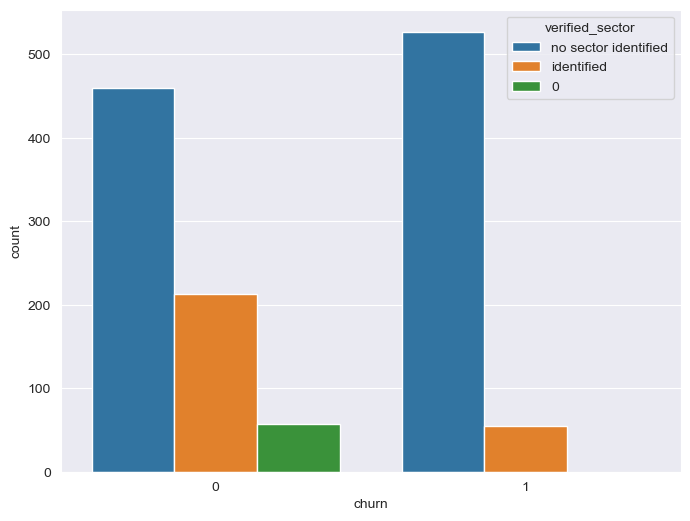

In [493]:
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(8, 6))
sns.countplot(data=transaction_stats_6_months_df, x="churn", hue="verified_sector")

<AxesSubplot:xlabel='churn', ylabel='count'>

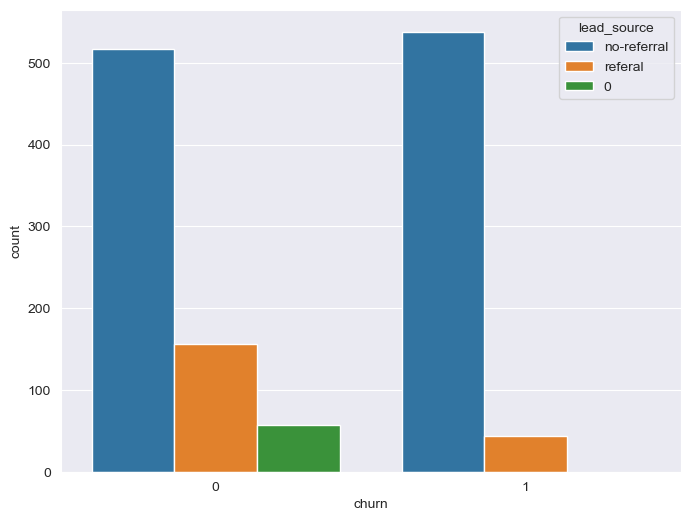

In [494]:
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(8, 6))
sns.countplot(data=transaction_stats_6_months_df, x="churn", hue="lead_source")

<AxesSubplot:xlabel='churn', ylabel='count'>

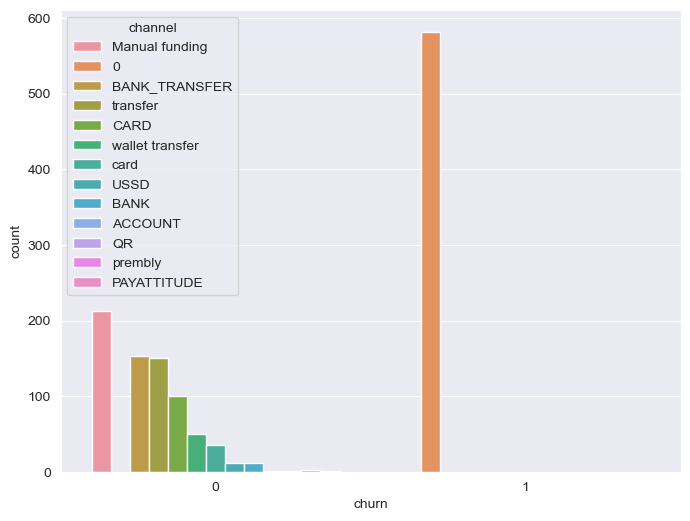

In [495]:
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(8, 6))
sns.countplot(data=transaction_stats_6_months_df, x="churn", hue="channel")

## Churned over Six Months

In [496]:
wallet_churn_6_months = transaction_stats_6_months_df[transaction_stats_6_months_df["churn"] == 1]
print(wallet_churn_6_months.shape)
wallet_churn_6_months.head(2)

(582, 11)


,org_id,business_name,email,phone,lead_source,channel,verified_sector,country,amount,trans_frequency,churn
1,004e301f-c4f5-482d-9895-27fbbe1bf7e1,Scholarly Educational Software Ltd,urchboy995@gmail.com,2.35E+12,no-referral,0,no sector identified,NG,0.00,0,1
2,007bee1d-8c43-480d-92d0-345f489277b0,Trybookings Nigeria Limited,temitopeolotin@tryspacely.com,2.35E+12,no-referral,0,no sector identified,NG,0.00,0,1


# Merchant Wallet Behaviour Over Three Months

In [497]:
merchant_wallet_3 = pd.merge(merchant_df, wallet_three_months_df, on=["org_id", "business_name"], how='outer')
merchant_wallet_3 = merchant_wallet_3.fillna(0)
print(merchant_wallet_3.shape)
print()
merchant_wallet_3.head(2)

(2599, 15)



,org_id,business_name,country,currency_x,verified_sector,platform,date_created,lead_source,business_document,email,phone,amount,channel,currency_y,date_of_transaction
0,450b7f93-9de4-46d1-a456-3235c6c0b632,Varens Technologies,NG,NGN,no sector identified,PREMBLY,2023-06,no-referral,uploaded,ini@varens.net,2.35E+12,0.00,0,0,0
1,3f58f27c-b63d-4d5f-a29c-29cddf85797a,Cliqki Technologies,NG,NGN,no sector identified,PREMBLY,2023-06,no-referral,uploaded,yemio@cliqki.com,2.35E+12,0.00,0,0,0


In [498]:
merchant_wallet_3 = merchant_wallet_3.drop("currency_x", axis=1)
merchant_wallet_3["trans_frequency"] = merchant_wallet_3["amount"]
print(merchant_wallet_3.shape)
print()
merchant_wallet_3.head(2)

(2599, 15)



,org_id,business_name,country,verified_sector,platform,date_created,lead_source,business_document,email,phone,amount,channel,currency_y,date_of_transaction,trans_frequency
0,450b7f93-9de4-46d1-a456-3235c6c0b632,Varens Technologies,NG,no sector identified,PREMBLY,2023-06,no-referral,uploaded,ini@varens.net,2.35E+12,0.00,0,0,0,0.00
1,3f58f27c-b63d-4d5f-a29c-29cddf85797a,Cliqki Technologies,NG,no sector identified,PREMBLY,2023-06,no-referral,uploaded,yemio@cliqki.com,2.35E+12,0.00,0,0,0,0.00


In [499]:
transaction_stats_3_months_df = merchant_wallet_3.groupby(["org_id", "business_name", "email", "phone", "lead_source", "channel", "verified_sector", "country"], as_index=False).agg({"amount": pd.Series.sum, "trans_frequency": pd.Series.count})
transaction_stats_3_months_df['trans_frequency'] = transaction_stats_3_months_df.apply(fix_, axis=1)
print(transaction_stats_3_months_df.shape)
print()
transaction_stats_3_months_df.head(2)

(1151, 10)



,org_id,business_name,email,phone,lead_source,channel,verified_sector,country,amount,trans_frequency
0,00101b8e-c430-40d1-b1f9-acab5577ea3b,Kasheto International Limited,hi@kasheto.com,2.35E+12,no-referral,0,no sector identified,NG,0.00,0
1,004e301f-c4f5-482d-9895-27fbbe1bf7e1,Scholarly Educational Software Ltd,urchboy995@gmail.com,2.35E+12,no-referral,0,no sector identified,NG,0.00,0


In [500]:
three_months_statistics = transaction_stats_3_months_df[["amount", "trans_frequency"]]
three_months_statistics.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
amount,1151.00,119844.92,1038524.85,0.00,0.00,0.00,5000.00,18297300.00
trans_frequency,1151.00,1.58,9.14,0.00,0.00,0.00,1.00,170.00


In [501]:
transaction_stats_3_months_df["churn"] = transaction_stats_3_months_df.apply(churn_or_not, axis=1)
print(transaction_stats_3_months_df.shape)
print()
transaction_stats_3_months_df.head(3)

(1151, 11)



,org_id,business_name,email,phone,lead_source,channel,verified_sector,country,amount,trans_frequency,churn
0,00101b8e-c430-40d1-b1f9-acab5577ea3b,Kasheto International Limited,hi@kasheto.com,2.35E+12,no-referral,0,no sector identified,NG,0.00,0,1
1,004e301f-c4f5-482d-9895-27fbbe1bf7e1,Scholarly Educational Software Ltd,urchboy995@gmail.com,2.35E+12,no-referral,0,no sector identified,NG,0.00,0,1
2,007bee1d-8c43-480d-92d0-345f489277b0,Trybookings Nigeria Limited,temitopeolotin@tryspacely.com,2.35E+12,no-referral,0,no sector identified,NG,0.00,0,1


### Analyzing Probable Reasons For Churn

<AxesSubplot:xlabel='churn', ylabel='count'>

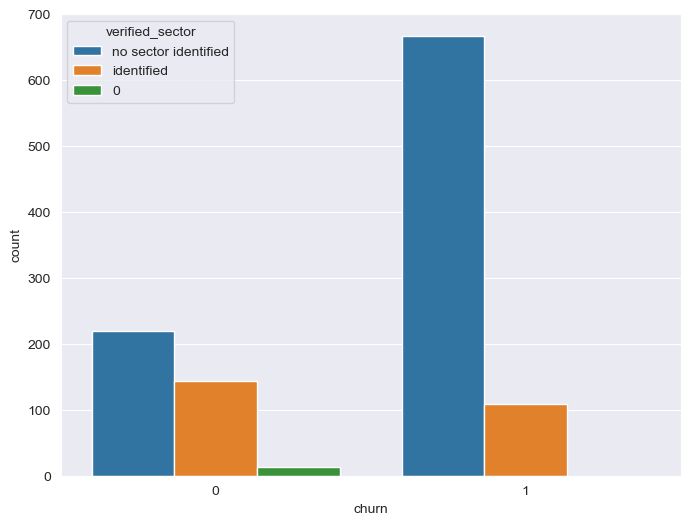

In [502]:
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(8, 6))
sns.countplot(data=transaction_stats_3_months_df, x="churn", hue="verified_sector")

<AxesSubplot:xlabel='churn', ylabel='count'>

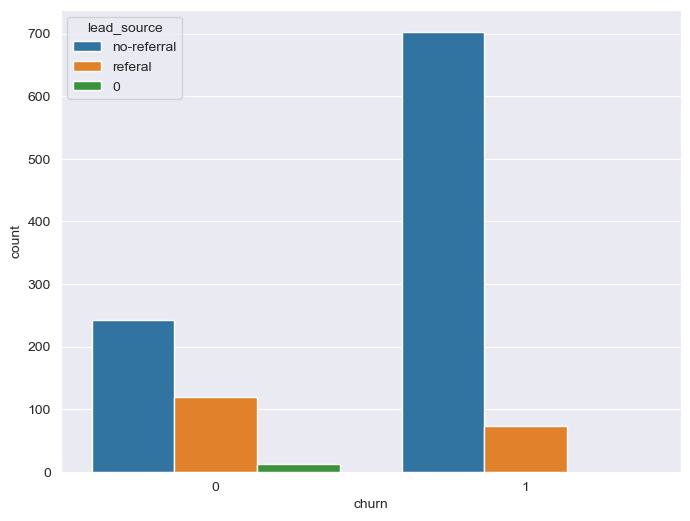

In [503]:
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(8, 6))
sns.countplot(data=transaction_stats_3_months_df, x="churn", hue="lead_source")

<AxesSubplot:xlabel='churn', ylabel='count'>

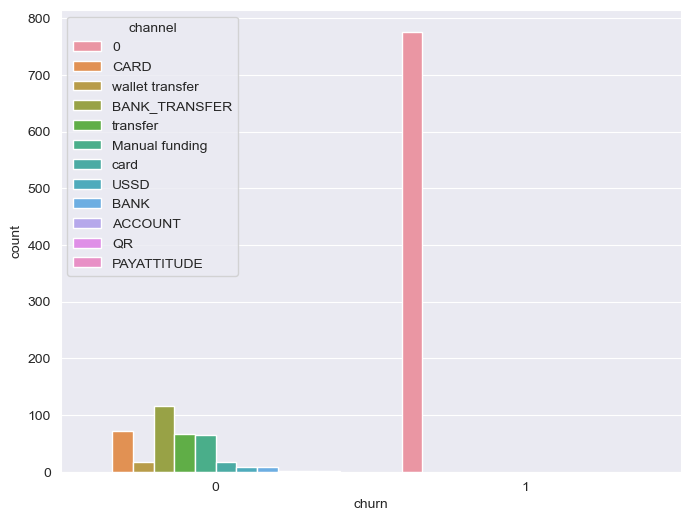

In [504]:
sns.set_style('darkgrid')
sns.despine
plt.figure(figsize=(8, 6))
sns.countplot(data=transaction_stats_3_months_df, x="churn", hue="channel")

### Churned Over Three Months

In [505]:
wallet_churn_3_months = transaction_stats_3_months_df[transaction_stats_3_months_df["churn"] == 1]
print(wallet_churn_3_months.shape)
wallet_churn_3_months.head(2)

(776, 11)


,org_id,business_name,email,phone,lead_source,channel,verified_sector,country,amount,trans_frequency,churn
0,00101b8e-c430-40d1-b1f9-acab5577ea3b,Kasheto International Limited,hi@kasheto.com,2.35E+12,no-referral,0,no sector identified,NG,0.00,0,1
1,004e301f-c4f5-482d-9895-27fbbe1bf7e1,Scholarly Educational Software Ltd,urchboy995@gmail.com,2.35E+12,no-referral,0,no sector identified,NG,0.00,0,1


# Churned 

In [506]:
wallet_merchant_churned_df = pd.merge(wallet_churn_6_months, wallet_churn_3_months, on=["org_id", "business_name", "email", "phone", "amount", "lead_source", "country", "trans_frequency", "channel", "verified_sector", "churn"], how='inner')
print(wallet_merchant_churned_df.shape)
print()
wallet_merchant_churned_df.head(2)

(582, 11)



,org_id,business_name,email,phone,lead_source,channel,verified_sector,country,amount,trans_frequency,churn
0,004e301f-c4f5-482d-9895-27fbbe1bf7e1,Scholarly Educational Software Ltd,urchboy995@gmail.com,2.35E+12,no-referral,0,no sector identified,NG,0.00,0,1
1,007bee1d-8c43-480d-92d0-345f489277b0,Trybookings Nigeria Limited,temitopeolotin@tryspacely.com,2.35E+12,no-referral,0,no sector identified,NG,0.00,0,1


In [511]:
check_merchant_df_3.head(2)

,org_id,business_name,total_calls,num_of_calls,country,currency,verified_sector,platform,date_created,lead_source,business_document,email,phone,status
0,007bee1d-8c43-480d-92d0-345f489277b0,Trybookings Nigeria Limited,9,3,NG,NGN,no sector identified,PREMBLY,2023-06-01,no-referral,uploaded,temitopeolotin@tryspacely.com,2.35E+12,half active
1,00991371-e050-4115-af48-999862fad9e8,Cydene Energy Services,36,4,NG,NGN,identified,PREMBLY,2023-08-01,no-referral,uploaded,express@cydene.com,9081111104,active


In [513]:
check_merchant_df.head(2)

,org_id,business_name,total_calls,num_of_calls,country,currency,verified_sector,platform,date_created,lead_source,business_document,email,phone,status
0,007bee1d-8c43-480d-92d0-345f489277b0,Trybookings Nigeria Limited,32,8,NG,NGN,no sector identified,PREMBLY,2023-06-01,no-referral,uploaded,temitopeolotin@tryspacely.com,2.35E+12,active
1,00991371-e050-4115-af48-999862fad9e8,Cydene Energy Services,104,6,NG,NGN,identified,PREMBLY,2023-08-01,no-referral,uploaded,express@cydene.com,9081111104,active


# Predictive Model

- create class labels
- preprocess features
- split data
- initialize and train tree based algorithms
- evaluate using standard metrics

## Create Class Label

In [516]:
# Generate Target Class
working_df = check_merchant_df.copy()

def generate_class(data):
    if data["status"] == "Churn":
        return 1
    else:
        return 0

# Apply the function to create the Target Class
working_df['churn'] = working_df.apply(generate_class, axis=1)
working_df.head(2)

,org_id,business_name,total_calls,num_of_calls,country,currency,verified_sector,platform,date_created,lead_source,business_document,email,phone,status,churn
0,007bee1d-8c43-480d-92d0-345f489277b0,Trybookings Nigeria Limited,32,8,NG,NGN,no sector identified,PREMBLY,2023-06-01,no-referral,uploaded,temitopeolotin@tryspacely.com,2.35E+12,active,0
1,00991371-e050-4115-af48-999862fad9e8,Cydene Energy Services,104,6,NG,NGN,identified,PREMBLY,2023-08-01,no-referral,uploaded,express@cydene.com,9081111104,active,0


In [529]:
working_df["country"] = working_df["country"].astype("category")
working_df["currency"] = working_df["currency"].astype("category")
working_df["verified_sector"] = working_df["verified_sector"].astype("category")
working_df["platform"] = working_df["platform"].astype("category")
working_df["lead_source"] = working_df["lead_source"].astype("category")
working_df["status"] = working_df["status"].astype("category")

working_df["country"] = working_df["country"].cat.codes
working_df["currency"] = working_df["currency"].cat.codes
working_df["verified_sector"] = working_df["verified_sector"].cat.codes
working_df["platform"] = working_df["platform"].cat.codes
working_df["lead_source"] = working_df["lead_source"].cat.codes
working_df["status"] = working_df["status"].cat.codes
working_df.head(2)

,org_id,business_name,total_calls,num_of_calls,country,currency,verified_sector,platform,date_created,lead_source,business_document,email,phone,status,churn
0,007bee1d-8c43-480d-92d0-345f489277b0,Trybookings Nigeria Limited,32,8,0,1,1,1,2023-06-01,0,uploaded,temitopeolotin@tryspacely.com,2.35E+12,1,0
1,00991371-e050-4115-af48-999862fad9e8,Cydene Energy Services,104,6,0,1,0,1,2023-08-01,0,uploaded,express@cydene.com,9081111104,1,0


In [531]:
working_df = working_df.drop(["org_id", "business_name", "date_created", "business_document", "email", "phone"], axis=1)
working_df.head(2)

,total_calls,num_of_calls,country,currency,verified_sector,platform,lead_source,status,churn
0,32,8,0,1,1,1,0,1,0
1,104,6,0,1,0,1,0,1,0


0    551
1     28
Name: churn, dtype: int64



Text(0.5, 1.0, 'Target Class Distribution')

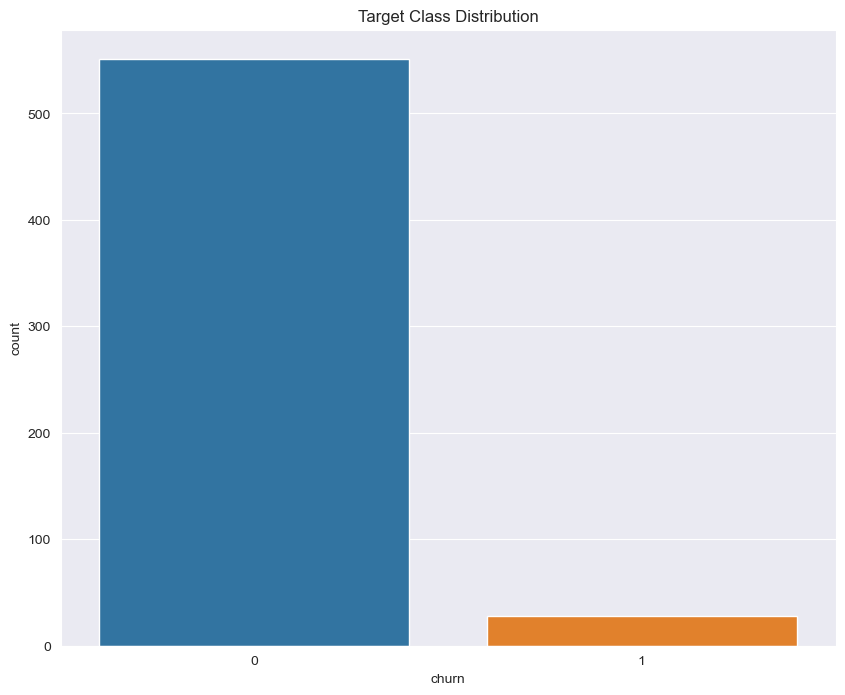

In [532]:
print(working_df.churn.value_counts())
print()
plt.figure(figsize=(10, 8))
sns.countplot(x="churn", data=working_df)
plt.title("Target Class Distribution")

## Data Spliting

In [534]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

X = working_df.drop("churn", axis=1)
y = working_df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(405, 8)
(405,)
(174, 8)
(174,)


## Model Training

- Random Forest Algorithm
- Decision Tree Algorithm

In [542]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictionss = model.predict(X_test)

## Model Performance Evaluation
- accuracy score
- precision
- recall
- f-measure
- confusion matrix
- ROC and AUC curve

In [543]:
print(" ======== Accuracy Score ======== ")
print(" ")
print(f"{accuracy_score(y_test, predictionss)} or {round(accuracy_score(y_test, predictionss) * 100, 1)}%")
print(" ")
print(" ======== Confustion Matrix ======== ")
print(" ")
print(confusion_matrix(y_test, predictionss))
print(" ")
print(" ======== Classification Report ======== ")
print(" ")
print(classification_report(y_test, predictionss))

 ======== Accuracy Score ======== 
 
1.0 or 100.0%
 
 ======== Confustion Matrix ======== 
 
[[166   0]
 [  0   8]]
 
 ======== Classification Report ======== 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00         8

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174



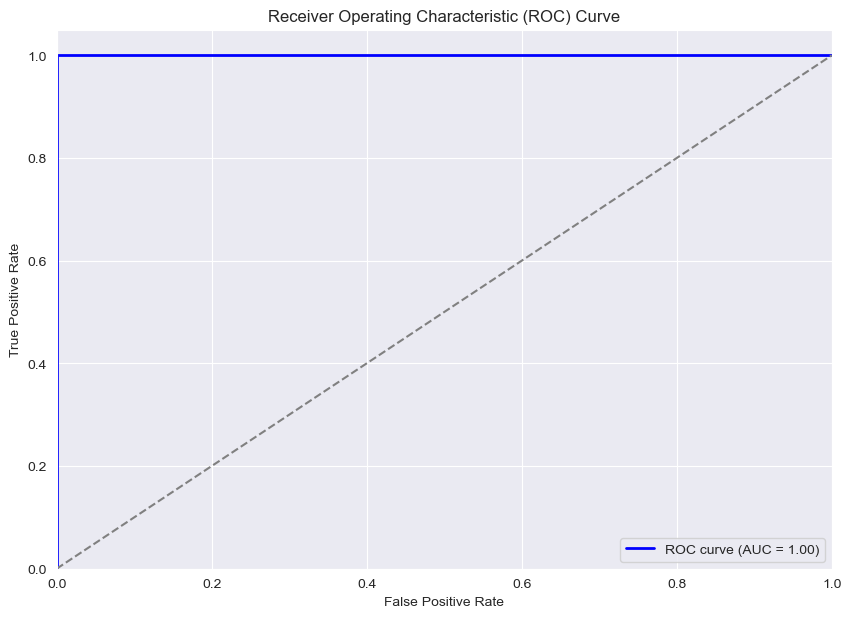

In [544]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictionss)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [545]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
predictionss = tree_model.predict(X_test)

In [546]:
print(" ======== Accuracy Score ======== ")
print(" ")
print(f"{accuracy_score(y_test, predictionss)} or {round(accuracy_score(y_test, predictionss) * 100, 1)}%")
print(" ")
print(" ======== Confustion Matrix ======== ")
print(" ")
print(confusion_matrix(y_test, predictionss))
print(" ")
print(" ======== Classification Report ======== ")
print(" ")
print(classification_report(y_test, predictionss))

 ======== Accuracy Score ======== 
 
1.0 or 100.0%
 
 ======== Confustion Matrix ======== 
 
[[166   0]
 [  0   8]]
 
 ======== Classification Report ======== 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00         8

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174



In [ ]:
# jupyter nbconvert --to html --no-input Churn.ipynb 

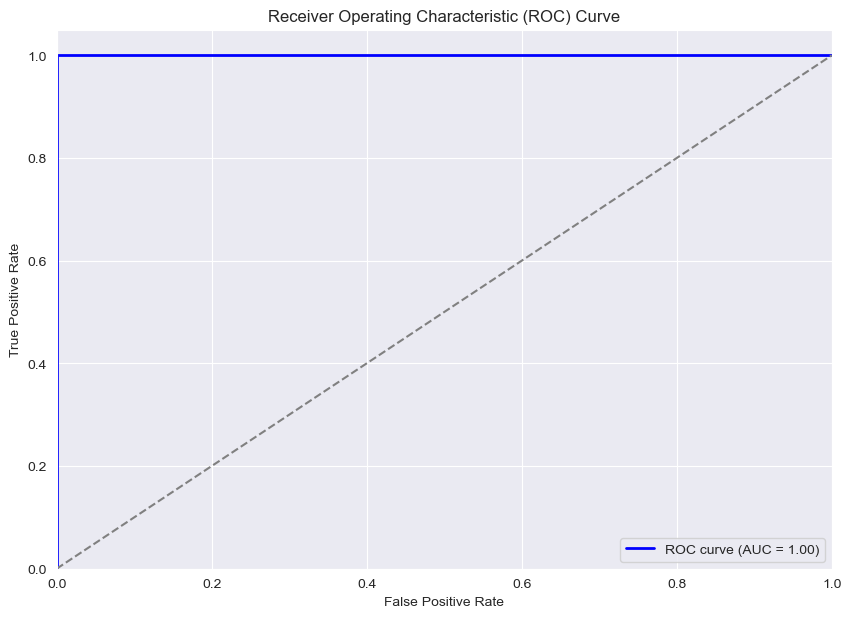

In [547]:
fpr, tpr, thresholds = roc_curve(y_test, predictionss)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()